In [ ]:
#%pip install patool
#!pip install rarfile
!pip install pyunpack patool
!apt-get install unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [2]:
#Unzip the files:
#%ls
#%cd ../
#%ls
#!unzip dataset.zip
from zipfile import ZipFile

with ZipFile('drive/MyDrive/dataset.zip', 'r') as zipObj:
  zipObj.extractall('./')

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving slice_0_3xbl2x-0004.png to slice_0_3xbl2x-0004.png
Saving slice_1_6eng5q-0053.png to slice_1_6eng5q-0053.png
Saving slice_16_1ud15m-0062.png to slice_16_1ud15m-0062.png
Saving slice_45_axccxn-0200.png to slice_45_axccxn-0200.png
Saving slice_111_6e10o9-0283.png to slice_111_6e10o9-0283.png
Saving slice_143_3fb2ii-0120.png to slice_143_3fb2ii-0120.png
Saving slice_367_jybstj-0387.png to slice_367_jybstj-0387.png
Saving slice_374_fmfbn2-0141.png to slice_374_fmfbn2-0141.png
User uploaded file "slice_0_3xbl2x-0004.png" with length 923892 bytes
User uploaded file "slice_1_6eng5q-0053.png" with length 1128831 bytes
User uploaded file "slice_16_1ud15m-0062.png" with length 1506196 bytes
User uploaded file "slice_45_axccxn-0200.png" with length 909782 bytes
User uploaded file "slice_111_6e10o9-0283.png" with length 354783 bytes
User uploaded file "slice_143_3fb2ii-0120.png" with length 468295 bytes
User uploaded file "slice_367_jybstj-0387.png" with length 1155890 bytes
User uploaded f

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_14 (Flatten)        (None, 25088)             0         
                                                                 
 dense_28 (Dense)            (None, 512)               12845568  
                                                                 
 dropout_14 (Dropout)        (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 27562821 (105.14 MB)
Trainable params: 12848133 (49.01 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Foun

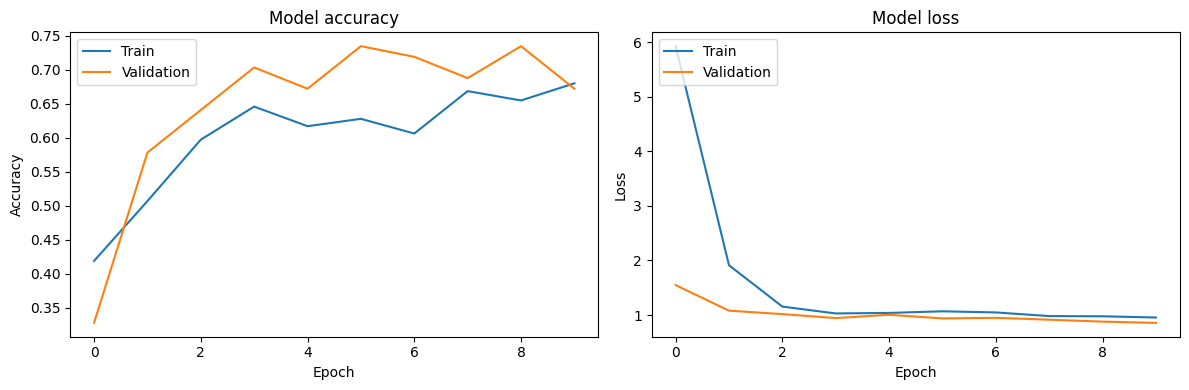

3/3 [==============================] - 3s 785ms/step


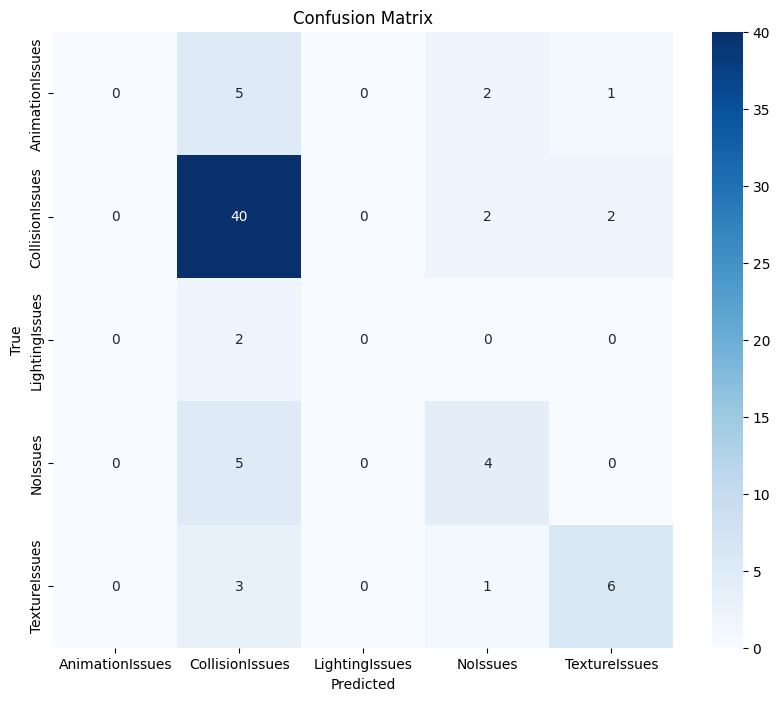

                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.73      0.91      0.81        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.44      0.44      0.44         9
  TextureIssues       0.67      0.60      0.63        10

       accuracy                           0.68        73
      macro avg       0.37      0.39      0.38        73
   weighted avg       0.58      0.68      0.63        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


NameError: name 'precision_recall_fscore_support' is not defined

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

validation_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
#/content/sample_data/dataset/train
train_generator = train_datagen.flow_from_directory('/content/sample_data/dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical', classes=classes)
validation_generator = validation_datagen.flow_from_directory('/content/sample_data/dataset/validation', target_size=(224, 224), batch_size=32, class_mode='categorical', classes=classes)
test_generator = test_datagen.flow_from_directory('/content/sample_data/dataset/test', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False, classes=classes)

print(train_generator.class_indices)

#Training:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // 32 + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=classes)
print(report)

# Precision, Recall, F1 Score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1_score}')

#Save the model:
#model.save('model1_VGG.h5')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
from sklearn.model_selection import ParameterGrid

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    for layer in base_model.layers:
        layer.trainable = False

    model = models.Sequential([
        base_model,
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(5, activation='softmax')
    ])

    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

    return model

def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
        '/content/sample_data/dataset/train',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes)

    validation_generator = validation_datagen.flow_from_directory(
        '/content/sample_data/dataset/validation',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes)

    test_generator = test_datagen.flow_from_directory(
        '/content/sample_data/dataset/test',
        target_size=(224, 224),
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes)

    return train_generator, validation_generator, test_generator

def evaluate_model(model, train_generator, validation_generator, epochs):
    history = model.fit(train_generator, validation_data=validation_generator, epochs=epochs, verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]  # Get the validation accuracy of the last epoch
    return val_accuracy

seed = 7
np.random.seed(seed)

# Hyperparameters to tune
batch_sizes = [32, 64, 128, 256]
epochs_list = [10, 20, 30, 50, 100]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

# Store the results
best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()
    print("Starting training...")
    val_accuracy = evaluate_model(model, train_generator, validation_generator, epochs)
    print("Training complete.")
    print(f"Params: {params}, Validation Accuracy: {val_accuracy}")

    if val_accuracy > best_score:
        best_score = val_accuracy
        best_params = params

print(f"Best params: {best_params}, Best validation accuracy: {best_score}")

# Train final model with best hyperparameters on full training data
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)
final_model = create_model()
final_model.fit(train_generator, validation_data=validation_generator, epochs=best_epochs, verbose=0)

# Evaluate final model on test data
test_loss, test_accuracy = final_model.evaluate(test_generator, verbose=0)
print(f"Test accuracy: {test_accuracy}")

Training with params: {'batch_size': 32, 'epochs': 10}
Found 588 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
Starting training...
Training complete.
Params: {'batch_size': 32, 'epochs': 10}, Validation Accuracy: 0.6363636255264282
Training with params: {'batch_size': 32, 'epochs': 20}
Found 588 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
Starting training...
Training complete.
Params: {'batch_size': 32, 'epochs': 20}, Validation Accuracy: 0.6969696879386902
Training with params: {'batch_size': 32, 'epochs': 30}
Found 588 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
Starting training...
Training complete.
Params: {'batch_size': 32, 'epochs': 30}, Validation Accuracy: 0.6818181872367859
Training with params: {'batch_size': 32, 'epochs': 50}
Found 588 images belonging to 5 classes.
Found 66 i

KeyboardInterrupt: 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 25088)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               6422784   
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21138757 (80.64 MB)
Trainable params: 6424069 (24.51 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________
Found 5

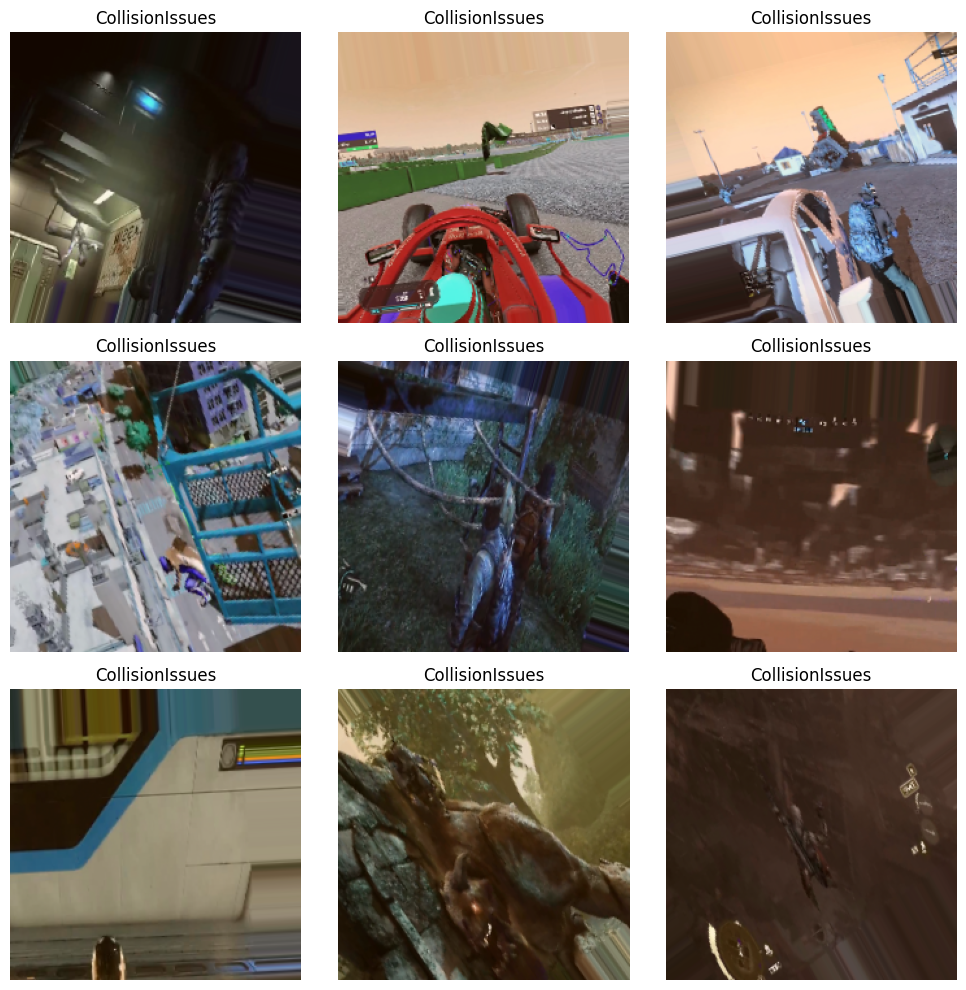

Shape of X_smote_img: (902, 224, 224, 3)
Shape of y_smote: (902, 5)
Epoch 1/10
29/29 [==============================] - 11s 333ms/step - loss: 2.3629 - accuracy: 0.4202 - val_loss: 1.2046 - val_accuracy: 0.5909
Epoch 2/10
29/29 [==============================] - 6s 218ms/step - loss: 0.9231 - accuracy: 0.6353 - val_loss: 1.1587 - val_accuracy: 0.5152
Epoch 3/10
29/29 [==============================] - 6s 216ms/step - loss: 0.7858 - accuracy: 0.7040 - val_loss: 1.1776 - val_accuracy: 0.5000
Epoch 4/10
29/29 [==============================] - 7s 243ms/step - loss: 0.6882 - accuracy: 0.7361 - val_loss: 1.1857 - val_accuracy: 0.5152
Epoch 5/10
29/29 [==============================] - 6s 213ms/step - loss: 0.5777 - accuracy: 0.7738 - val_loss: 1.1050 - val_accuracy: 0.5909
Epoch 6/10
29/29 [==============================] - 9s 312ms/step - loss: 0.5014 - accuracy: 0.8071 - val_loss: 1.1320 - val_accuracy: 0.5758
Epoch 7/10
29/29 [==============================] - 6s 211ms/step - loss: 0.481

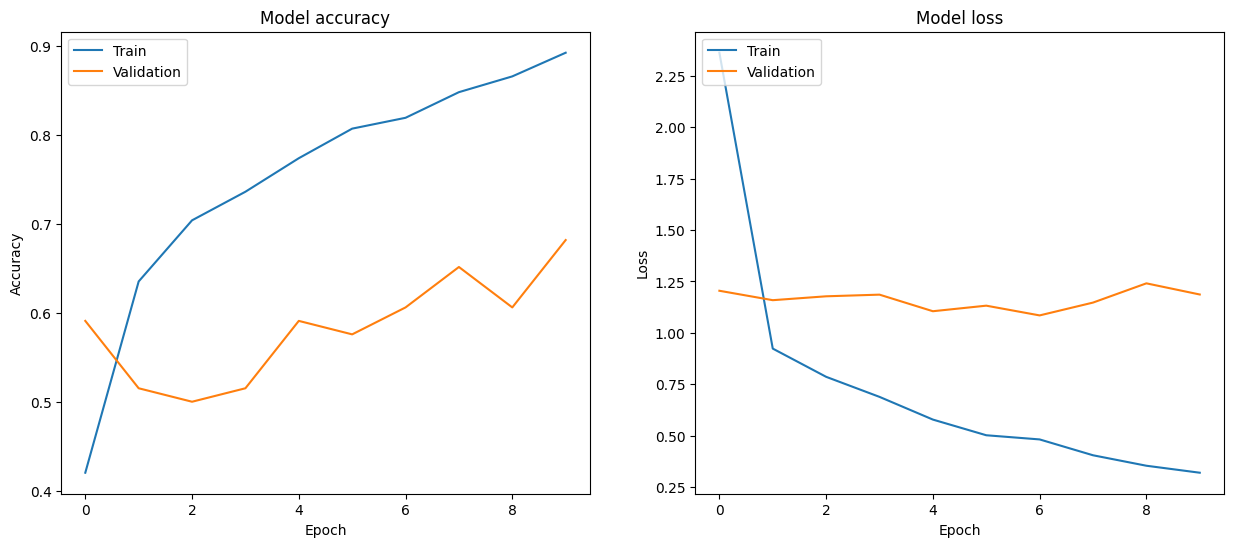

3/3 [==============================] - 3s 712ms/step - loss: 1.3011 - accuracy: 0.7123
Test Accuracy: 71.23%
Test Loss: 1.3011
3/3 [==============================] - 3s 755ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.29      0.25      0.27         8
CollisionIssues       0.75      0.93      0.83        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       1.00      0.44      0.62         9
  TextureIssues       0.71      0.50      0.59        10

       accuracy                           0.71        73
      macro avg       0.55      0.43      0.46        73
   weighted avg       0.70      0.71      0.68        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1000x1000 with 0 Axes>

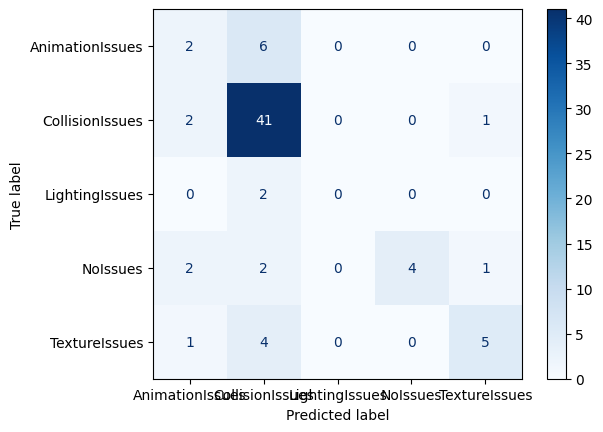

Precision: 0.7018
Recall: 0.7123
F1 Score: 0.6849


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import os

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'), #, kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

validation_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=32, class_mode='categorical')
test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False)
#print classes:
print(train_generator.class_indices)

#Get number of images in each class before augmentation
print('Number of images in the train folder:')
print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


# Plot some augmented images
plot_augmented_images(train_generator, train_generator.class_indices)


x_list = []
y_list = []

for i in range(len(train_generator)):
    x_batch, y_batch = next(train_generator)
    x_list.append(x_batch)
    y_list.append(y_batch)

x = np.concatenate(x_list)
y = np.concatenate(y_list)

X_train = x.reshape(x.shape[0], -1)

train_generator.reset()

# Apply SMOTE to balance minority classes
minority_class_indices = [train_generator.class_indices['AnimationIssues'], train_generator.class_indices['LightingIssues']]
sm = SMOTE(sampling_strategy={i: 200 for i in minority_class_indices}, random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y)

# Reshape data back to image dimensions
X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

# Print the shape of the oversampled data
print('Shape of X_smote_img:', X_smote_img.shape)
print('Shape of y_smote:', y_smote.shape)

#Check data quality



#Train:
epochs = 10
history = model.fit(
    X_smote_img, y_smote,
    #steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=epochs,
    validation_data=validation_generator
    #validation_steps=validation_generator.samples // validation_generator.batch_size
)

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 16, 'epochs': 10}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/10
37/37 [==============================] - ETA: 0s - loss: 3.7295 - accuracy: 0.4482
Epoch 1: val_accuracy improved from -inf to 0.60606, saving model to best_vgg16model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


37/37 [==============================] - 32s 791ms/step - loss: 3.7295 - accuracy: 0.4482 - val_loss: 1.1332 - val_accuracy: 0.6061
Epoch 2/10
37/37 [==============================] - ETA: 0s - loss: 1.4038 - accuracy: 0.4992
Epoch 2: val_accuracy improved from 0.60606 to 0.65152, saving model to best_vgg16model.h5
37/37 [==============================] - 30s 797ms/step - loss: 1.4038 - accuracy: 0.4992 - val_loss: 1.1391 - val_accuracy: 0.6515
Epoch 3/10
37/37 [==============================] - ETA: 0s - loss: 1.3327 - accuracy: 0.5891
Epoch 3: val_accuracy improved from 0.65152 to 0.68182, saving model to best_vgg16model.h5
37/37 [==============================] - 30s 800ms/step - loss: 1.3327 - accuracy: 0.5891 - val_loss: 1.0857 - val_accuracy: 0.6818
Epoch 4/10
37/37 [==============================] - ETA: 0s - loss: 1.3490 - accuracy: 0.5942
Epoch 4: val_accuracy did not improve from 0.68182
37/37 [==============================] - 29s 788ms/step - loss: 1.3490 - accuracy: 0.5942

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1000x1000 with 0 Axes>

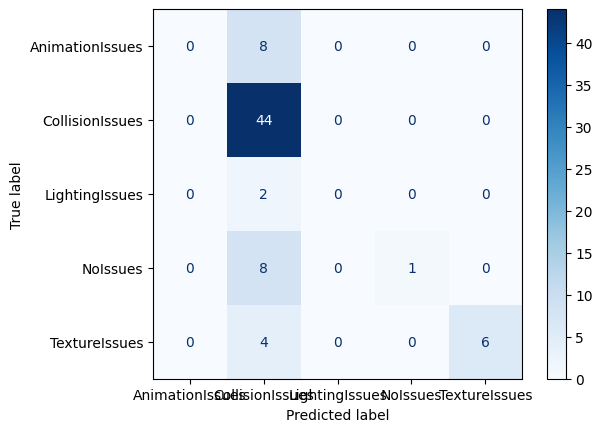

Precision: 0.6621
Recall: 0.6986
F1 Score: 0.6096


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      #layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.7),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [16, 32, 64]
epochs_list = [10, 20, 50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)
final_model = create_model()
#x_list = []
#y_list = []

'''
for i in range(len(train_generator)):
  x_batch, y_batch = next(train_generator)
  x_list.append(x_batch)
  y_list.append(y_batch)

  x = np.concatenate(x_list)
  y = np.concatenate(y_list)

  X_train = x.reshape(x.shape[0], -1)

  train_generator.reset()

  # Apply SMOTE to balance minority classes
  minority_class_indices = [train_generator.class_indices['AnimationIssues'], train_generator.class_indices['LightingIssues']]
  sm = SMOTE(sampling_strategy={i: 200 for i in minority_class_indices}, random_state=42)
  X_smote, y_smote = sm.fit_resample(X_train, y)

  # Reshape data back to image dimensions
  X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)
'''

# history = final_model.fit(
#       train_generator,
#       steps_per_epoch=train_generator.samples // train_generator.batch_size,
#       epochs=best_epochs,
#       validation_data=validation_generator,
#       validation_steps=validation_generator.samples // validation_generator.batch_size
#     )

best_model = tf.keras.models.load_model('best_vgg16model.h5')

#Plot the accuracy and loss curves:
# plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 3.8762 - accuracy: 0.4788
Epoch 1: val_accuracy improved from -inf to 0.48485, saving model to best_vgg16model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 33s 2s/step - loss: 3.8762 - accuracy: 0.4788 - val_loss: 1.3124 - val_accuracy: 0.4848
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.4729 - accuracy: 0.5620
Epoch 2: val_accuracy improved from 0.48485 to 0.63636, saving model to best_vgg16model.h5
19/19 [==============================] - 30s 2s/step - loss: 1.4729 - accuracy: 0.5620 - val_loss: 1.0446 - val_accuracy: 0.6364
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.1297 - accuracy: 0.5823
Epoch 3: val_accuracy improved from 0.63636 to 0.66667, saving model to best_vgg16model.h5
19/19 [==============================] - 30s 2s/step - loss: 1.1297 - accuracy: 0.5823 - val_loss: 1.0371 - val_accuracy: 0.6667
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.0962 - accuracy: 0.6248
Epoch 4: val_accuracy did not improve from 0.66667
19/19 [==============================] - 29s 2s/step - loss: 1.0962 - accuracy: 0.6248 - val_loss:

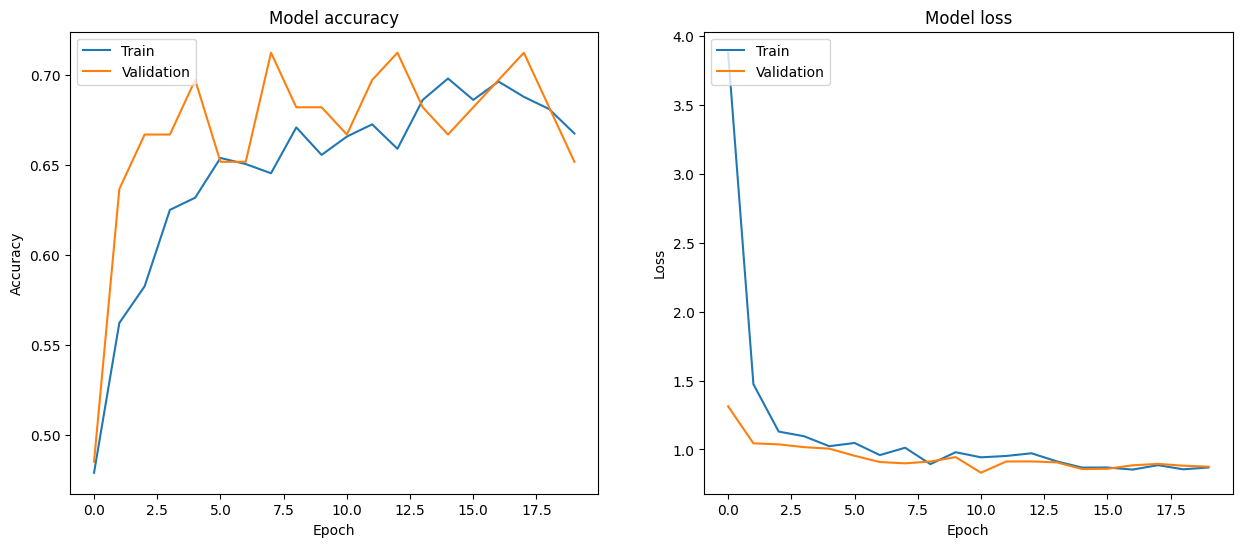

3/3 [==============================] - 3s 678ms/step - loss: 0.9359 - accuracy: 0.6575
Test Accuracy: 65.75%
Test Loss: 0.9359
3/3 [==============================] - 3s 728ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.66      0.95      0.78        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.60      0.33      0.43         9
  TextureIssues       0.75      0.30      0.43        10

       accuracy                           0.66        73
      macro avg       0.40      0.32      0.33        73
   weighted avg       0.57      0.66      0.58        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1000x1000 with 0 Axes>

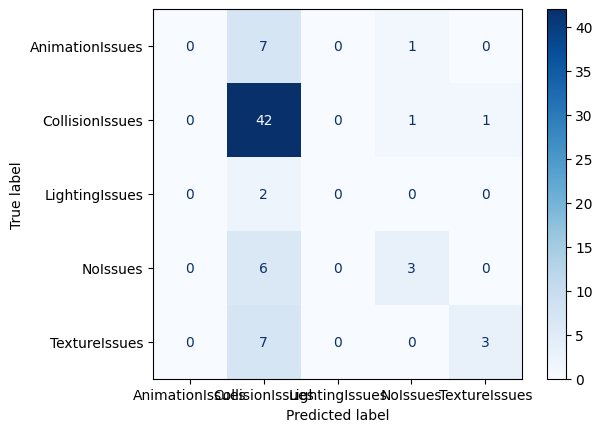

Precision: 0.5723
Recall: 0.6575
F1 Score: 0.5803


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      #layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dense(512, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)
final_model = create_model()
#x_list = []
#y_list = []

'''
for i in range(len(train_generator)):
  x_batch, y_batch = next(train_generator)
  x_list.append(x_batch)
  y_list.append(y_batch)

  x = np.concatenate(x_list)
  y = np.concatenate(y_list)

  X_train = x.reshape(x.shape[0], -1)

  train_generator.reset()

  # Apply SMOTE to balance minority classes
  minority_class_indices = [train_generator.class_indices['AnimationIssues'], train_generator.class_indices['LightingIssues']]
  sm = SMOTE(sampling_strategy={i: 200 for i in minority_class_indices}, random_state=42)
  X_smote, y_smote = sm.fit_resample(X_train, y)

  # Reshape data back to image dimensions
  X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)
'''

# history = final_model.fit(
#       train_generator,
#       steps_per_epoch=train_generator.samples // train_generator.batch_size,
#       epochs=best_epochs,
#       validation_data=validation_generator,
#       validation_steps=validation_generator.samples // validation_generator.batch_size
#     )

best_model = tf.keras.models.load_model('best_vgg16model.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(10, 10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Now we'll take the model with the best accuracy from the previous test and try to improve other hyperparameters
Model: batch_size 32, epochs 20
We will be adding regularization, dropout, try different numbers of units per layer, add callback functions for early stopping, try different learning rates, different optimizers, activation functions, and even try to unfreeze some pre-trained layers

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 1.7547 - accuracy: 0.5348
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochs.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 33s 2s/step - loss: 1.7547 - accuracy: 0.5348 - val_loss: 4.5861 - val_accuracy: 0.5909
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.5125 - accuracy: 0.5857
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.5125 - accuracy: 0.5857 - val_loss: 4.4923 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.4142 - accuracy: 0.6180
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.4142 - accuracy: 0.6180 - val_loss: 6.5718 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.3010 - accuracy: 0.6503
Epoch 4: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.3010 - accuracy: 0.6503 - val_loss: 3.9863 - val_accuracy: 0.5909
Epoch 5/20
19/19 [==============================]

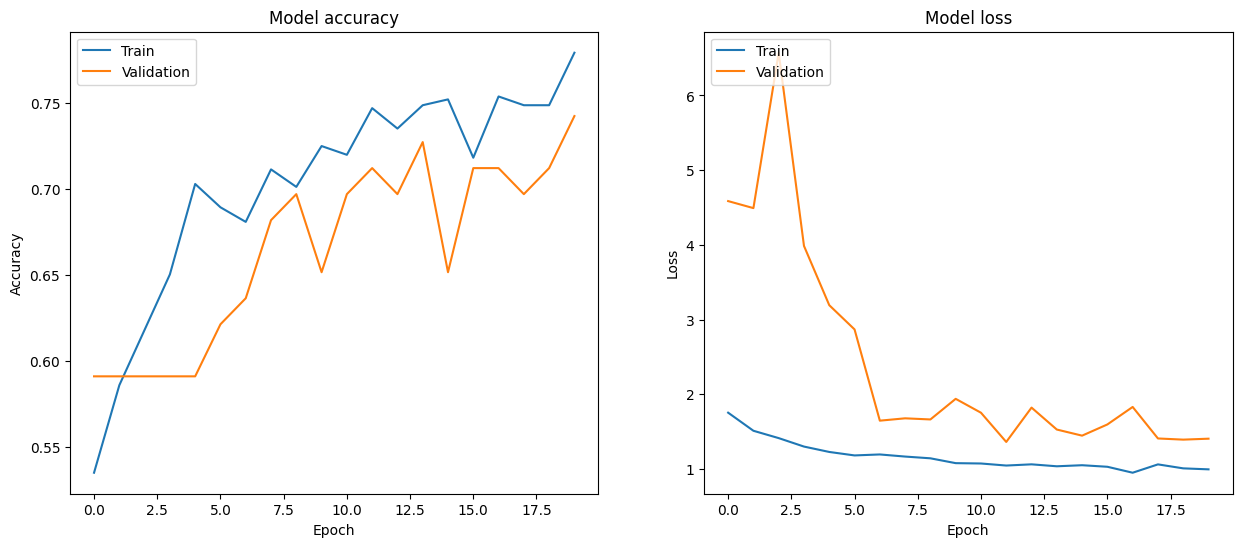

3/3 [==============================] - 3s 710ms/step - loss: 1.3630 - accuracy: 0.7260
Test Accuracy: 72.60%
Test Loss: 1.3630
3/3 [==============================] - 3s 740ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.75      0.93      0.83        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.56      0.56      0.56         9
  TextureIssues       0.78      0.70      0.74        10

       accuracy                           0.73        73
      macro avg       0.42      0.44      0.42        73
   weighted avg       0.62      0.73      0.67        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

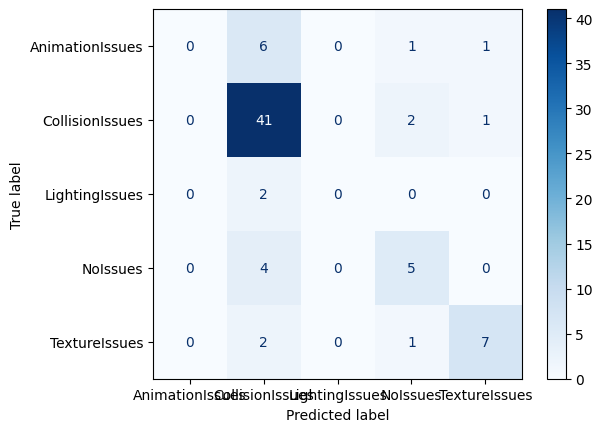

Precision: 0.6244
Recall: 0.7260
F1 Score: 0.6687


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Adding class weights to the model:

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
{0: 0.14566279682731584, 1: 0.027884021106943317, 2: 0.5740827874958918, 3: 0.1318838836139211, 4: 0.12048651095592791}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - 33s 2s/step - loss: 0.4454 - accuracy: 0.2683 - val_loss: 8.7911 - val_accuracy: 0.1212
Epoch 2/20
19/19 [==============================] - 30s 2s/step - loss: 0.3905 - accuracy: 0.2937 - val_loss: 3.2814 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - 30s 2s/step - loss: 0.3673 - accuracy: 0.3684 - val_loss: 2.8414 - val_accuracy: 0.6061
Epoch 4/20
19/19 [==============================] - 30s 2s/step - loss: 0.3509 - accuracy: 0.4533 -

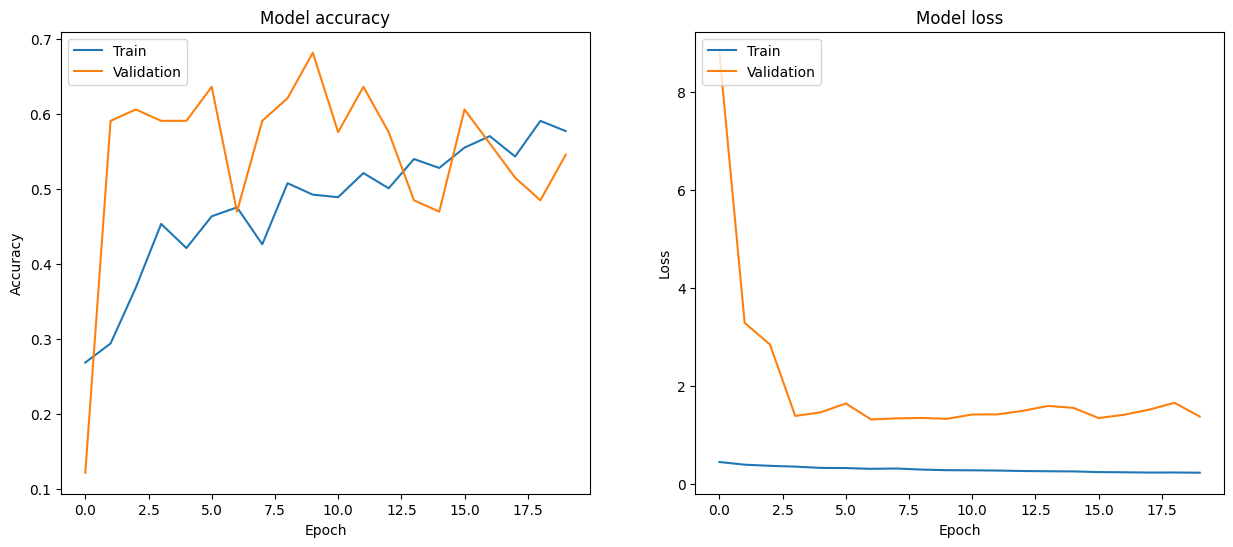

3/3 [==============================] - 3s 713ms/step - loss: 1.2132 - accuracy: 0.7123
Test Accuracy: 71.23%
Test Loss: 1.2132
3/3 [==============================] - 3s 746ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.70      0.95      0.81        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.33      0.40         9
  TextureIssues       1.00      0.70      0.82        10

       accuracy                           0.71        73
      macro avg       0.44      0.40      0.41        73
   weighted avg       0.62      0.71      0.65        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x1500 with 0 Axes>

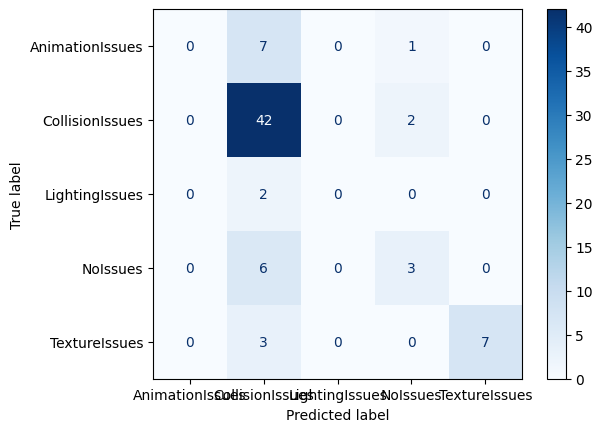

Precision: 0.6205
Recall: 0.7123
F1 Score: 0.6490


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #Compute class weights
    y_train = train_generator.classes

    # Step 1: Compute class frequencies
    class_frequencies = np.bincount(y_train)

    # Step 2: Compute inverse class frequencies
    total_samples = np.sum(class_frequencies)
    class_inverse_frequencies = total_samples / class_frequencies

    # Step 3: Normalize weights
    class_weights = class_inverse_frequencies / np.sum(class_inverse_frequencies)
    print(dict(enumerate(class_weights)))
    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      class_weight=dict(enumerate(class_weights))
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Without class-weights, now we try to unfreeze some layers

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 1.8148 - accuracy: 0.5229
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsUnfreezedLayers.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 33s 2s/step - loss: 1.8148 - accuracy: 0.5229 - val_loss: 28.4524 - val_accuracy: 0.5909
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.7345 - accuracy: 0.5518
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.7345 - accuracy: 0.5518 - val_loss: 5.8417 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.6078 - accuracy: 0.5416
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.6078 - accuracy: 0.5416 - val_loss: 4.5034 - val_accuracy: 0.3333
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.3660 - accuracy: 0.6231
Epoch 4: val_accuracy improved from 0.59091 to 0.62121, saving model to best_vgg16model32batch20epochsUnfreezedLayers.h5
19/19 [==============================] - 30s 2s/step - loss: 1.3660 - accuracy: 0.6231 - val_loss: 1.5947 -

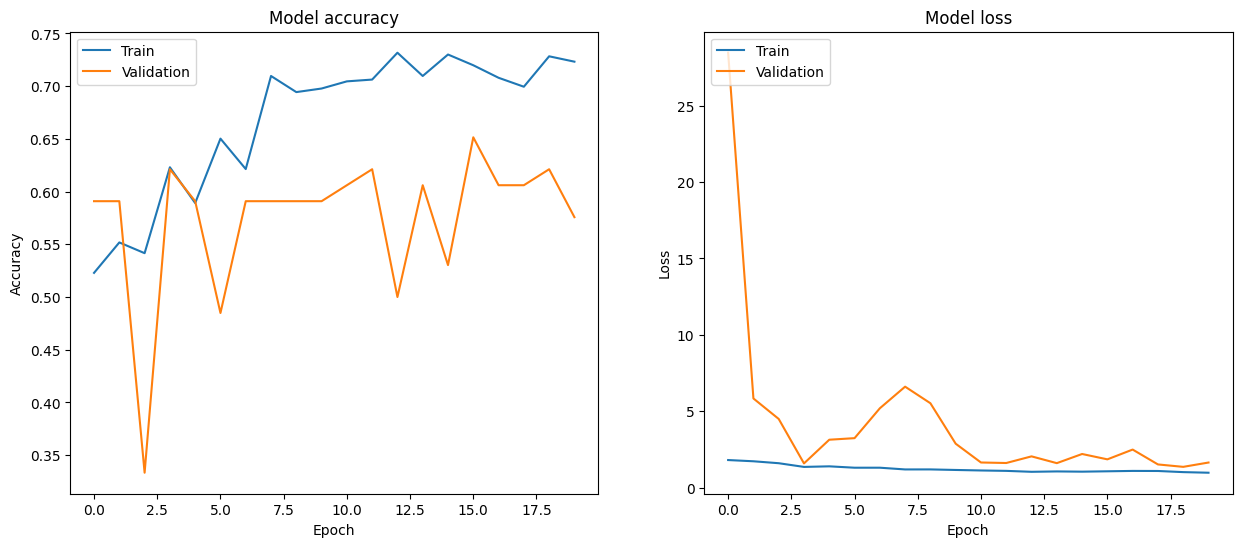

3/3 [==============================] - 3s 722ms/step - loss: 1.7204 - accuracy: 0.6575
Test Accuracy: 65.75%
Test Loss: 1.7204


3/3 [==============================] - 3s 742ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.67      0.95      0.79        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.60      0.60      0.60        10

       accuracy                           0.66        73
      macro avg       0.25      0.31      0.28        73
   weighted avg       0.48      0.66      0.56        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x1500 with 0 Axes>

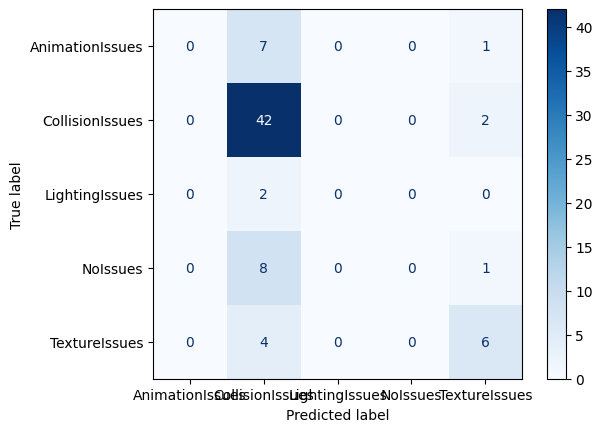

Precision: 0.4840
Recall: 0.6575
F1 Score: 0.5554


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:15]:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsUnfreezedLayers.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None

for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      #class_weight=dict(enumerate(class_weights))
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsUnfreezedLayers.h5')


#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 15))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Use different optimizers and learning rates

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'SGD'}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 2.5464 - accuracy: 0.1528
Epoch 1: val_accuracy improved from -inf to 0.50000, saving model to best_vgg16model32batch20epochsOptimizersLR.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 32s 2s/step - loss: 2.5464 - accuracy: 0.1528 - val_loss: 1.7097 - val_accuracy: 0.5000
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.9285 - accuracy: 0.3056
Epoch 2: val_accuracy improved from 0.50000 to 0.59091, saving model to best_vgg16model32batch20epochsOptimizersLR.h5
19/19 [==============================] - 30s 2s/step - loss: 1.9285 - accuracy: 0.3056 - val_loss: 1.6145 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.7405 - accuracy: 0.4431
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.7405 - accuracy: 0.4431 - val_loss: 1.5417 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.6649 - accuracy: 0.5042
Epoch 4: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.6649 - accuracy: 0.5042 - val_loss: 1.5068 - val

3/3 [==============================] - 3s 742ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.72      0.98      0.83        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.33      0.40         9
  TextureIssues       0.86      0.60      0.71        10

       accuracy                           0.71        73
      macro avg       0.41      0.38      0.39        73
   weighted avg       0.61      0.71      0.64        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

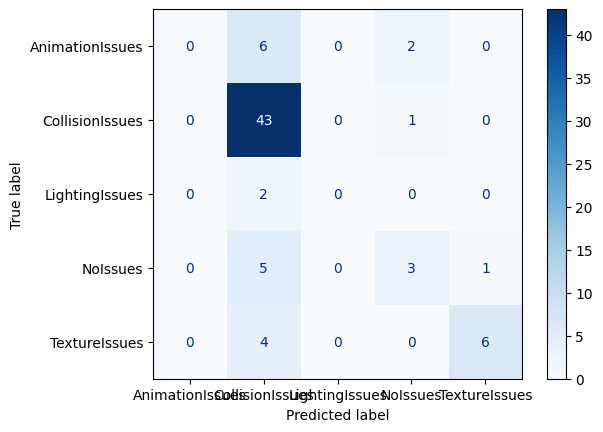

Precision: 0.6110
Recall: 0.7123
F1 Score: 0.6444


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsOptimizersLR.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['SGD', 'RMSprop', 'Adam']
learning_rates = [0.001, 0.01, 0.0027]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsOptimizersLR.h5')

#Plot the accuracy and loss curves:
# plt.figure(figsize=(15, 6))
# plt.subplot(1, 2, 1)
# plt.plot(history.history['accuracy'])
# plt.plot(history.history['val_accuracy'])
# plt.title('Model accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')

# plt.subplot(1, 2, 2)
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Validation'], loc='upper left')
# plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with RMSprop optimizer and learning rate 0.0027

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - 32s 2s/step - loss: 1.8867 - accuracy: 0.5246 - val_loss: 5.4968 - val_accuracy: 0.5152
Epoch 2/20
19/19 [==============================] - 29s 2s/step - loss: 1.4865 - accuracy: 0.6010 - val_loss: 7.3748 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - 29s 2s/step - loss: 1.3178 - accuracy: 0.6503 - val_loss: 4.0543 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - 29s 2s/step - loss: 1.2773 - accuracy: 0.6520 - val_loss: 4.7559 - val_accuracy: 0.5909
Epoch 5/20
19/19 [================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

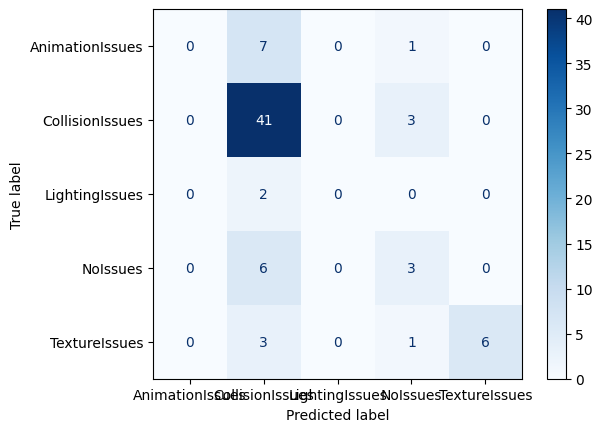

Precision: 0.6021
Recall: 0.6849
F1 Score: 0.6261
Best params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Adam'}, Best validation accuracy: 0.7424242496490479
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}


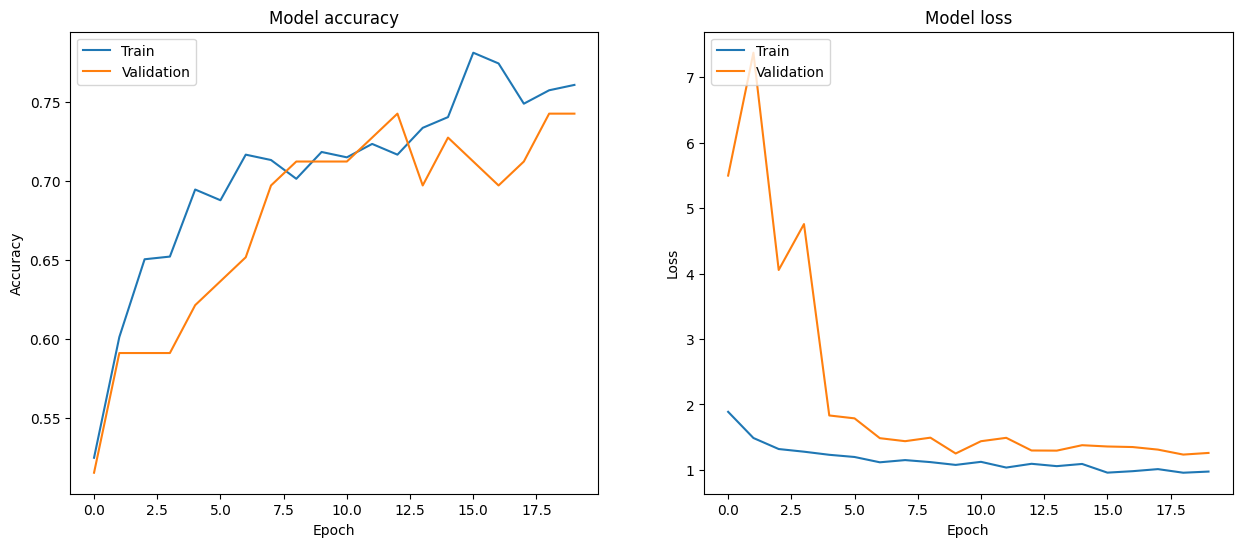

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsRMSprop.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['Adam']
learning_rates = [0.001]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      #callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params

    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    test_generator.reset()
    # Predict the values from the test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=class_names))
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(15, 25))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")




print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

#best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsRMSprop.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss, accuracy = best_model.evaluate(test_generator)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")
# print(f"Test Loss: {loss:.4f}")

# test_generator.reset()
# # Predict the values from the test set
# Y_pred = best_model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# y_true = test_generator.classes
# class_names = list(test_generator.class_indices.keys())

# # Print classification report
# print(classification_report(y_true, y_pred, target_names=class_names))

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# # Plot confusion matrix
# plt.figure(figsize=(15, 25))
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # Compute precision, recall, and F1 score
# precision = precision_score(y_true, y_pred, average='weighted')
# recall = recall_score(y_true, y_pred, average='weighted')
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0027, 'optimizer': 'RMSprop'}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - 33s 2s/step - loss: 2.2019 - accuracy: 0.5467 - val_loss: 2.5884 - val_accuracy: 0.6364
Epoch 2/20
19/19 [==============================] - 30s 2s/step - loss: 1.7046 - accuracy: 0.5722 - val_loss: 2.4782 - val_accuracy: 0.4848
Epoch 3/20
19/19 [==============================] - 29s 2s/step - loss: 1.5572 - accuracy: 0.6384 - val_loss: 5.4039 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - 29s 2s/step - loss: 1.4959 - accuracy: 0.6706 - val_loss: 6.0718 - val_accuracy: 0.5909
Epoch 5/20
19/19 [============

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

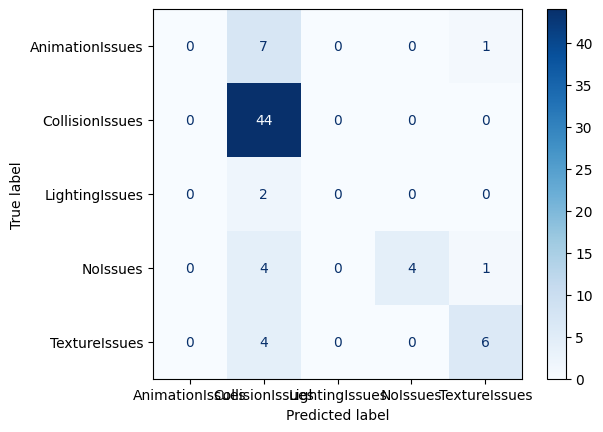

Precision: 0.6608
Recall: 0.7397
F1 Score: 0.6723
Best params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0027, 'optimizer': 'RMSprop'}, Best validation accuracy: 0.6818181872367859
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}


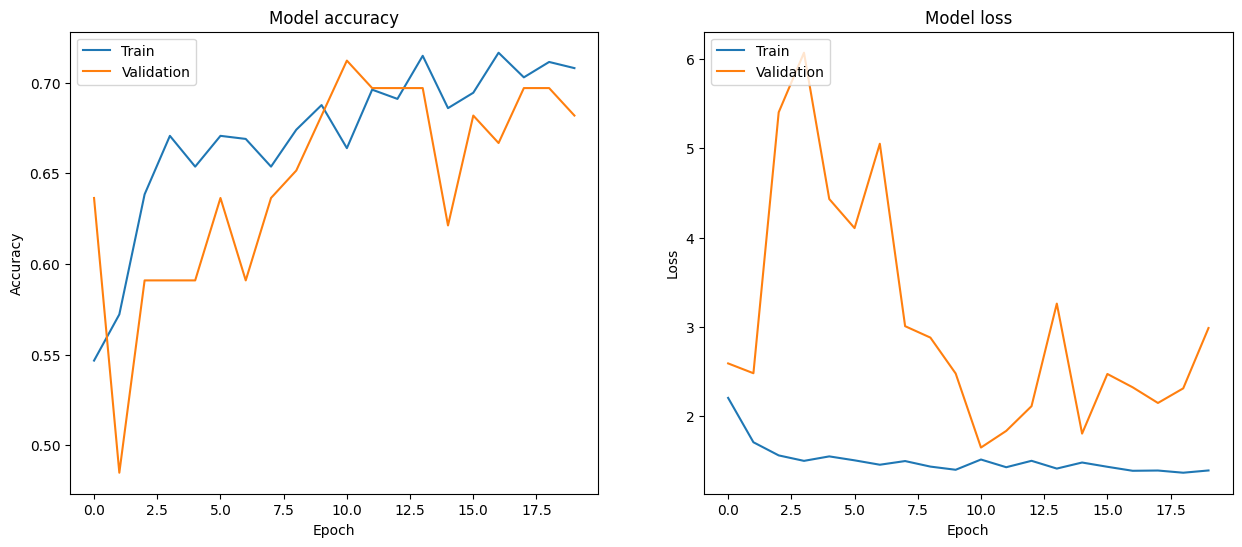

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsRMSprop.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['RMSprop']
learning_rates = [0.0027]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      #callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params

    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    test_generator.reset()
    # Predict the values from the test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=class_names))
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(15, 25))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")




print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

#best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsRMSprop.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss, accuracy = best_model.evaluate(test_generator)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")
# print(f"Test Loss: {loss:.4f}")

# test_generator.reset()
# # Predict the values from the test set
# Y_pred = best_model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# y_true = test_generator.classes
# class_names = list(test_generator.class_indices.keys())

# # Print classification report
# print(classification_report(y_true, y_pred, target_names=class_names))

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# # Plot confusion matrix
# plt.figure(figsize=(15, 25))
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # Compute precision, recall, and F1 score
# precision = precision_score(y_true, y_pred, average='weighted')
# recall = recall_score(y_true, y_pred, average='weighted')
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Now train with different units per layer (128, 256, 512, 1024)

In [ ]:
print("ok")

ok


Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Adam', 'units_per_layer': 2048}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 2.3422 - accuracy: 0.5450
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsAdam.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 33s 2s/step - loss: 2.3422 - accuracy: 0.5450 - val_loss: 4.0428 - val_accuracy: 0.5909
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.8843 - accuracy: 0.5840
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.8843 - accuracy: 0.5840 - val_loss: 7.8971 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.8206 - accuracy: 0.6095
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.8206 - accuracy: 0.6095 - val_loss: 2.5616 - val_accuracy: 0.5606
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.6057 - accuracy: 0.6333
Epoch 4: val_accuracy did not improve from 0.59091
19/19 [==============================] - 29s 2s/step - loss: 1.6057 - accuracy: 0.6333 - val_loss: 3.7305 - val_accuracy: 0.5758
Epoch 5/20
19/19 [==============================]

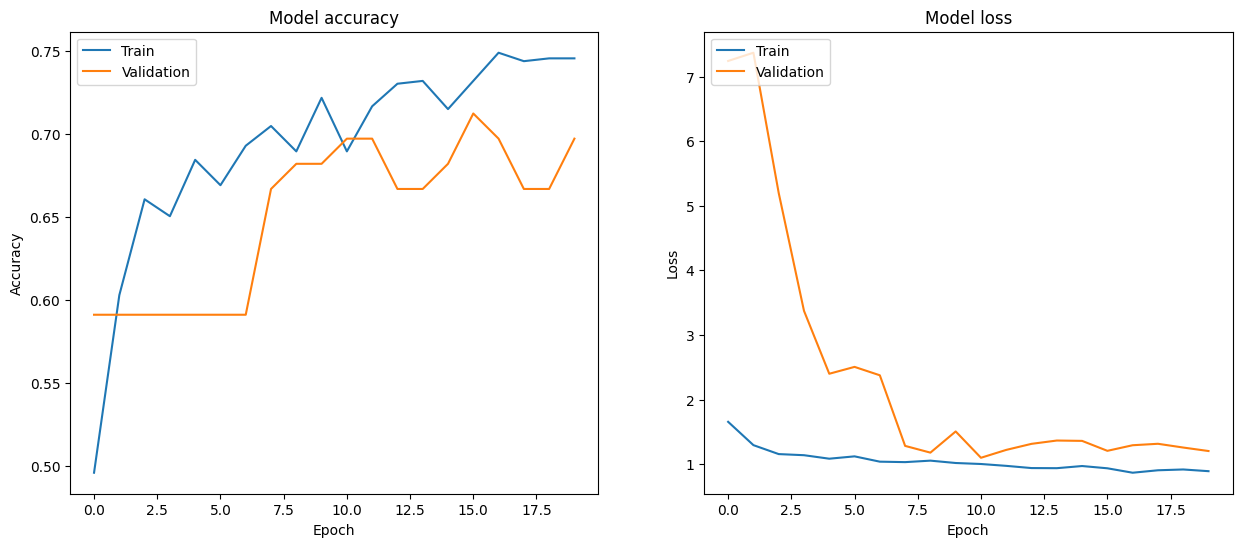

3/3 [==============================] - 3s 716ms/step - loss: 1.6530 - accuracy: 0.7123
Test Accuracy: 71.23%
Test Loss: 1.6530
3/3 [==============================] - 3s 737ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.76      0.89      0.82        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.47      0.78      0.58         9
  TextureIssues       0.86      0.60      0.71        10

       accuracy                           0.71        73
      macro avg       0.42      0.45      0.42        73
   weighted avg       0.64      0.71      0.66        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

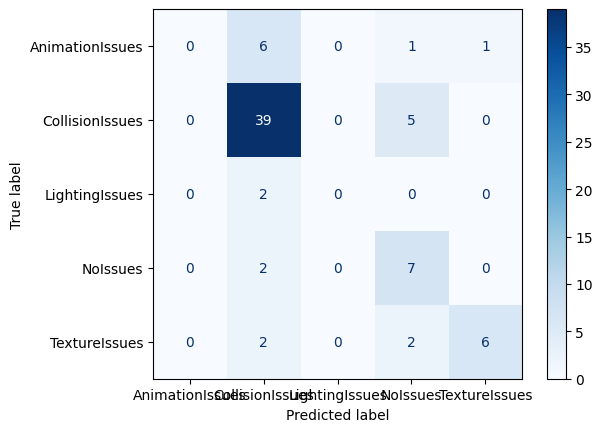

Precision: 0.6359
Recall: 0.7123
F1 Score: 0.6635


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate, units):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(units // 2, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(units // 4, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsAdam.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['Adam']
learning_rates = [0.001]
units = [2048, 1024, 512]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates, 'units_per_layer': units}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    units_per_layer = params['units_per_layer']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate, units_per_layer)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdam.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Now change the activation function (relu, elu, tahn)

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'Adam', 'units_per_layer': 4096}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
58889256/58889256 [==============================] - 3s 0us/step
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 2.0140 - accuracy: 0.5161
Epoch 1: val_accuracy improved from -inf to 0.27273, saving model to best_vgg16model32batch20epochsAdamV2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 37s 2s/step - loss: 2.0140 - accuracy: 0.5161 - val_loss: 1.9841 - val_accuracy: 0.2727
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.9193 - accuracy: 0.5501
Epoch 2: val_accuracy improved from 0.27273 to 0.66667, saving model to best_vgg16model32batch20epochsAdamV2.h5
19/19 [==============================] - 32s 2s/step - loss: 1.9193 - accuracy: 0.5501 - val_loss: 1.6383 - val_accuracy: 0.6667
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.7374 - accuracy: 0.5620
Epoch 3: val_accuracy did not improve from 0.66667
19/19 [==============================] - 29s 2s/step - loss: 1.7374 - accuracy: 0.5620 - val_loss: 1.5989 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.6547 - accuracy: 0.5959
Epoch 4: val_accuracy did not improve from 0.66667
19/19 [==============================] - 29s 2s/step - loss: 1.6547 - accuracy: 0.5959 - val_loss: 1.5955 - val_accur

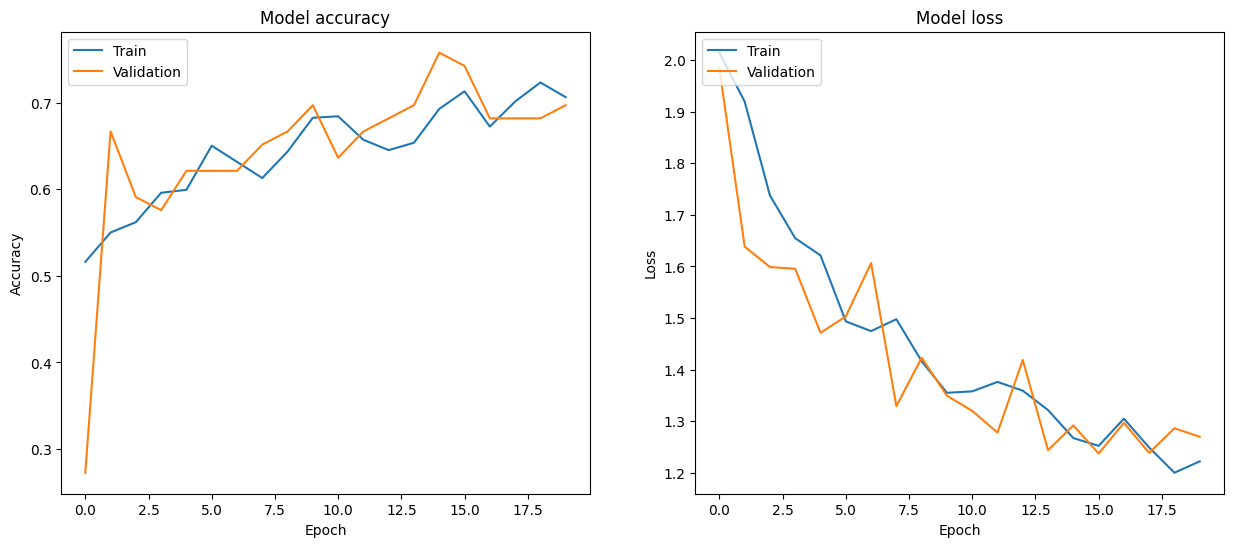

3/3 [==============================] - 4s 1s/step - loss: 1.2889 - accuracy: 0.6849
Test Accuracy: 68.49%
Test Loss: 1.2889
3/3 [==============================] - 3s 745ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.75      0.86      0.80        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.67      0.57         9
  TextureIssues       0.60      0.60      0.60        10

       accuracy                           0.68        73
      macro avg       0.37      0.43      0.39        73
   weighted avg       0.59      0.68      0.63        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

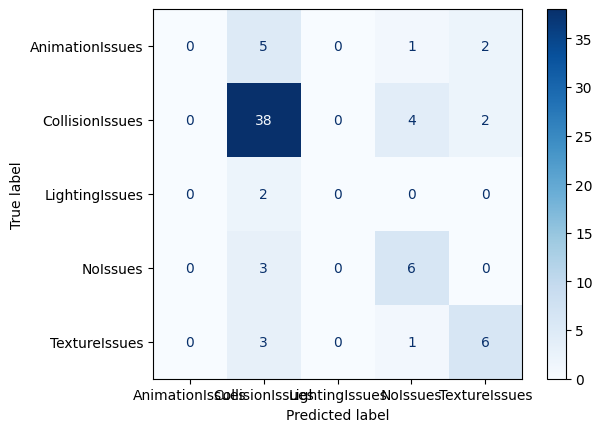

Precision: 0.5929
Recall: 0.6849
F1 Score: 0.6348


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate, units):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.00005)),
      #layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(units // 2, activation='relu', kernel_regularizer=regularizers.l2(0.00005)),
      #layers.BatchNormalization(),
      layers.Dropout(0.3),
      layers.Dense(units // 4, activation='relu', kernel_regularizer=regularizers.l2(0.00005)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsAdamV2.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['Adam']
learning_rates = [0.0001]
units = [4096]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates, 'units_per_layer': units}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    units_per_layer = params['units_per_layer']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate, units_per_layer)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdamV2.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.0001, 'optimizer': 'Adam', 'units_per_layer': 2048}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
58889256/58889256 [==============================] - 3s 0us/step
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 8.9585 - accuracy: 0.1902
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsAdamV2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 42s 2s/step - loss: 8.9585 - accuracy: 0.1902 - val_loss: 6.8072 - val_accuracy: 0.5909
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 7.6903 - accuracy: 0.4024
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 7.6903 - accuracy: 0.4024 - val_loss: 6.6433 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 7.2946 - accuracy: 0.4703
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 7.2946 - accuracy: 0.4703 - val_loss: 6.4207 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 7.0804 - accuracy: 0.4703
Epoch 4: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 7.0804 - accuracy: 0.4703 - val_loss: 6.1905 - val_accuracy: 0.5909
Epoch 5/20
19/19 [==============================]

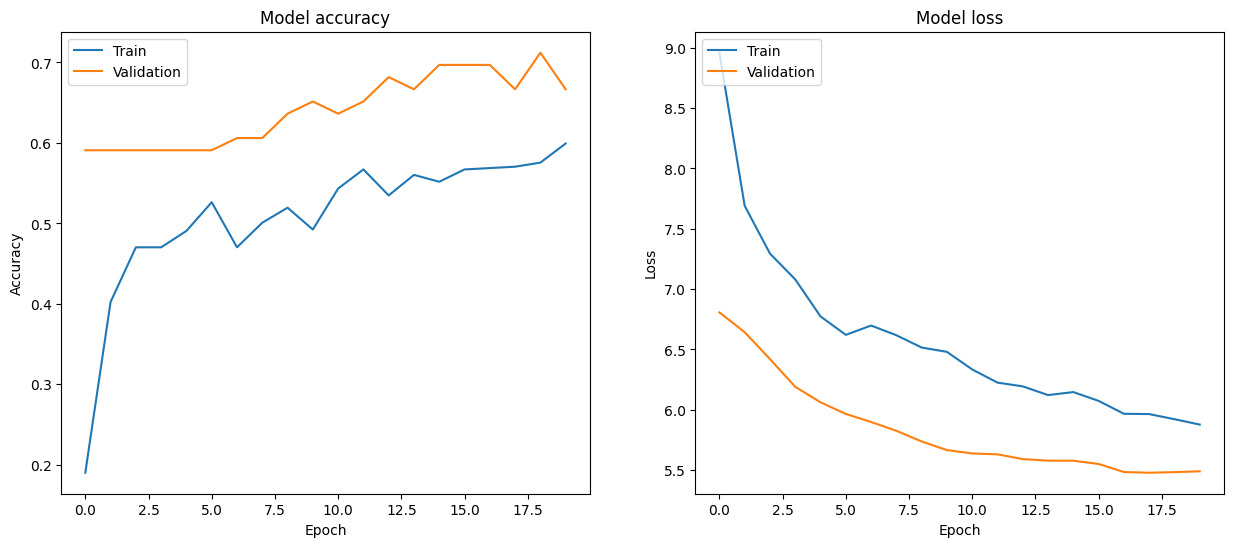

3/3 [==============================] - 5s 1s/step - loss: 5.5365 - accuracy: 0.6849
Test Accuracy: 68.49%
Test Loss: 5.5365
3/3 [==============================] - 3s 762ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.74      0.89      0.80        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.42      0.56      0.48         9
  TextureIssues       0.75      0.60      0.67        10

       accuracy                           0.68        73
      macro avg       0.38      0.41      0.39        73
   weighted avg       0.60      0.68      0.63        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

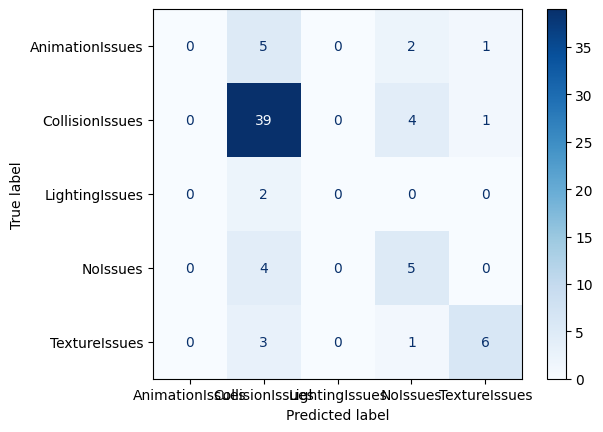

Precision: 0.5976
Recall: 0.6849
F1 Score: 0.6347


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate, units):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(units, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.5),
      layers.Dense(units // 2, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(units // 4, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(units // 8, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsAdamV2.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['Adam']
learning_rates = [0.0001]
units = [2048]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates, 'units_per_layer': units}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    units_per_layer = params['units_per_layer']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate, units_per_layer)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdamV2.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Now I'll also try other activation functions like leaky_relu or swish

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Adam', 'units_per_layer': 2048}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 7.9481 - accuracy: 0.4805
Epoch 1: val_accuracy improved from -inf to 0.57576, saving model to best_vgg16model32batch20epochsAdamV2.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 35s 2s/step - loss: 7.9481 - accuracy: 0.4805 - val_loss: 9.5359 - val_accuracy: 0.5758
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 8.1370 - accuracy: 0.5195
Epoch 2: val_accuracy improved from 0.57576 to 0.59091, saving model to best_vgg16model32batch20epochsAdamV2.h5
19/19 [==============================] - 31s 2s/step - loss: 8.1370 - accuracy: 0.5195 - val_loss: 10.3474 - val_accuracy: 0.5909
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 8.0259 - accuracy: 0.5331
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 8.0259 - accuracy: 0.5331 - val_loss: 9.4416 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 7.7527 - accuracy: 0.5586
Epoch 4: val_accuracy improved from 0.59091 to 0.60606, saving model to best_vgg16model32batch20epochsAdamV2.h5
19/19 [==============================] - 31s 2s/step - 

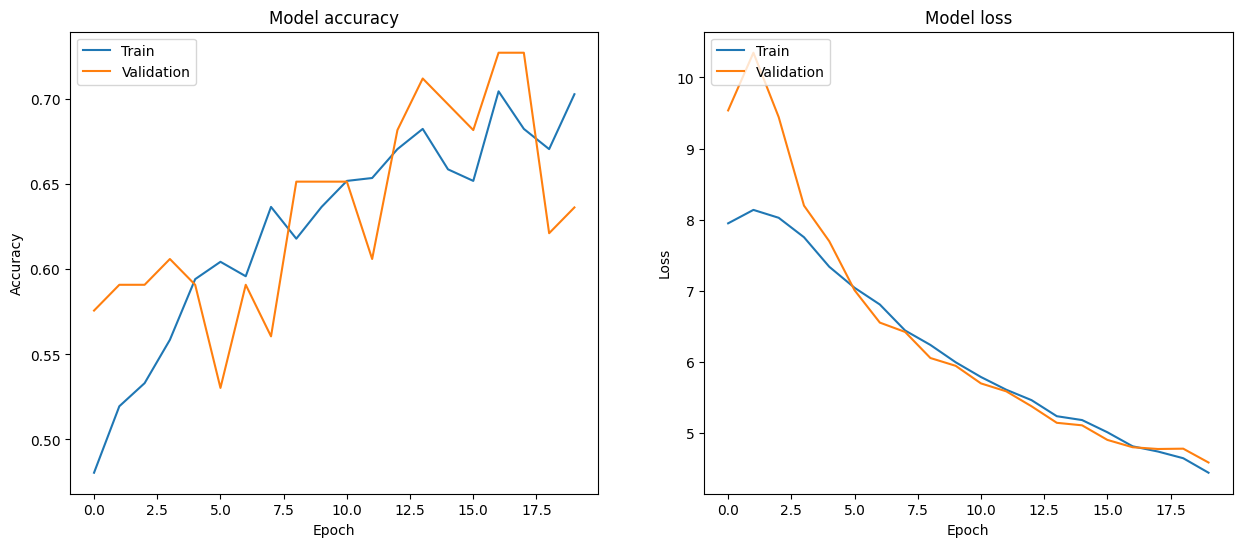

3/3 [==============================] - 3s 726ms/step - loss: 4.9039 - accuracy: 0.7123
Test Accuracy: 71.23%
Test Loss: 4.9039
3/3 [==============================] - 3s 755ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.81      0.86      0.84        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.89      0.64         9
  TextureIssues       0.60      0.60      0.60        10

       accuracy                           0.71        73
      macro avg       0.38      0.47      0.42        73
   weighted avg       0.63      0.71      0.66        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

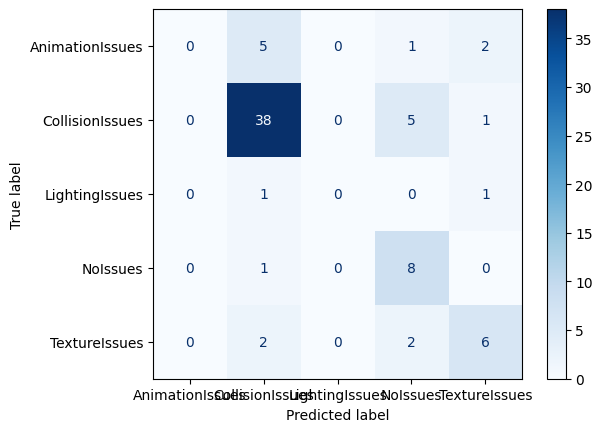

Precision: 0.6312
Recall: 0.7123
F1 Score: 0.6645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LeakyReLU
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate, units):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(units, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.5),
      layers.Dense(units // 2, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(units // 4, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.Dropout(0.5),
      layers.Dense(units // 8),
      LeakyReLU(alpha=0.01),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsAdamV2.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]
optimizers = ['Adam']
learning_rates = [0.001]
units = [2048]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates, 'units_per_layer': units}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    units_per_layer = params['units_per_layer']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate, units_per_layer)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdamV2.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Add learning rate scheduler and early stopping

Training with params: {'batch_size': 32, 'epochs': 20, 'learning_rate': 0.001, 'optimizer': 'Adam', 'units_per_layer': 2048}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 8.5529 - accuracy: 0.4380
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsAdamV3.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 35s 2s/step - loss: 8.5529 - accuracy: 0.4380 - val_loss: 11.7846 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 8.4461 - accuracy: 0.5314
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 8.4461 - accuracy: 0.5314 - val_loss: 13.5015 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 8.3655 - accuracy: 0.5280
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 8.3655 - accuracy: 0.5280 - val_loss: 9.9594 - val_accuracy: 0.5909 - lr: 0.0010
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 8.0919 - accuracy: 0.5586
Epoch 4: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 8.0919 - accuracy: 0.5586 - val_loss: 8.9295 - val_accuracy: 0.5909 - lr: 0.

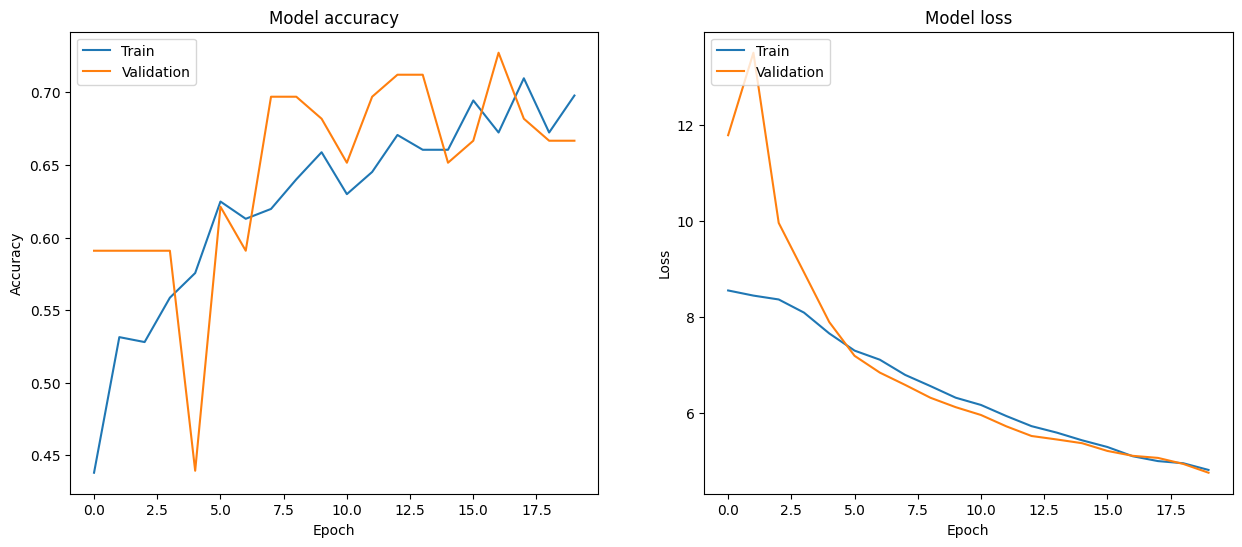

3/3 [==============================] - 3s 730ms/step - loss: 5.1797 - accuracy: 0.6438
Test Accuracy: 64.38%
Test Loss: 5.1797
3/3 [==============================] - 3s 756ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.78      0.80      0.79        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.32      0.67      0.43         9
  TextureIssues       0.67      0.60      0.63        10

       accuracy                           0.64        73
      macro avg       0.35      0.41      0.37        73
   weighted avg       0.60      0.64      0.61        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

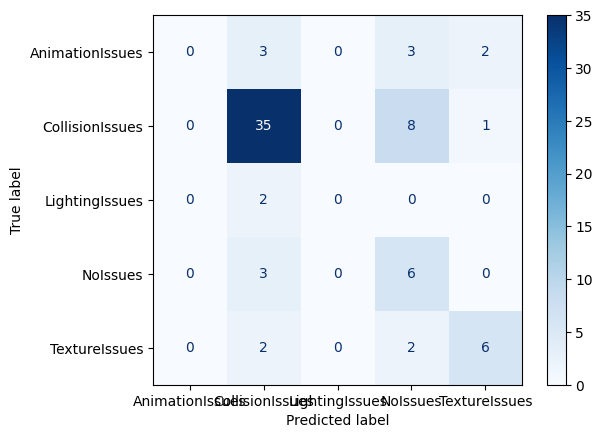

Precision: 0.5991
Recall: 0.6438
F1 Score: 0.6134


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LeakyReLU
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate, units):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(units, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.5),
      layers.Dense(units // 2, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.BatchNormalization(),
      layers.Dropout(0.5),
      layers.Dense(units // 4, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.Dropout(0.5),
      layers.Dense(units // 8, kernel_regularizer=regularizers.l2(0.001)),
      LeakyReLU(alpha=0.01),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsAdamV3.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


batch_sizes = [32]
epochs_list = [20]
optimizers = ['Adam']
learning_rates = [0.001]
units = [2048]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates, 'units_per_layer': units}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    units_per_layer = params['units_per_layer']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate, units_per_layer)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback, reduce_lr, early_stopping]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdamV3.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Next: change epochs, unfreeze layers, more data augmentation

Training with params: {'batch_size': 64, 'epochs': 50, 'learning_rate': 0.001, 'optimizer': 'Adam', 'units_per_layer': 1024}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/50
10/10 [==============================] - ETA: 0s - loss: 2.1478 - accuracy: 0.4788
Epoch 1: val_accuracy improved from -inf to 0.06061, saving model to best_vgg16model32batch20epochsAdamV4.h5
10/10 [==============================] - 37s 3s/step - loss: 2.1478 - accuracy: 0.4788 - val_loss: 140.4066 - val_accuracy: 0.0606 - lr: 0.0010
Epoch 2/50
10/10 [==============================] - ETA: 0s - loss: 1.8904 - accuracy: 0.4856
Epoch 2: val_accuracy improved from 0.06061 to 0.22727, saving model to best_vgg16model32batch20epochsAdamV4.h5
10/10 [=========

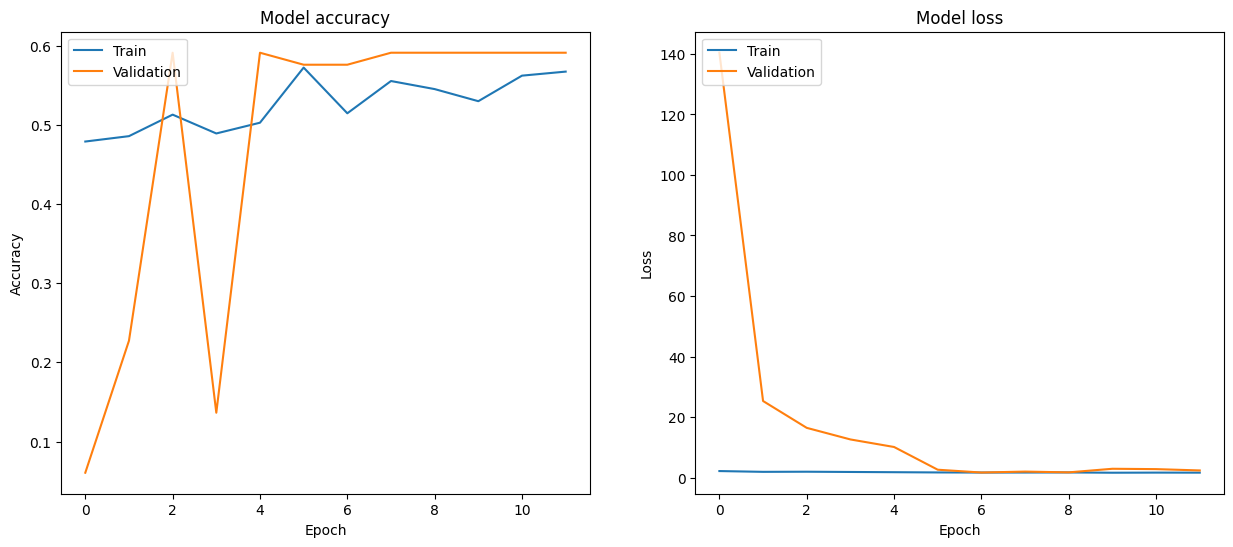

2/2 [==============================] - 3s 309ms/step - loss: 15.7444 - accuracy: 0.6027
Test Accuracy: 60.27%
Test Loss: 15.7444


2/2 [==============================] - 3s 448ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.60      1.00      0.75        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.00      0.00      0.00        10

       accuracy                           0.60        73
      macro avg       0.12      0.20      0.15        73
   weighted avg       0.36      0.60      0.45        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

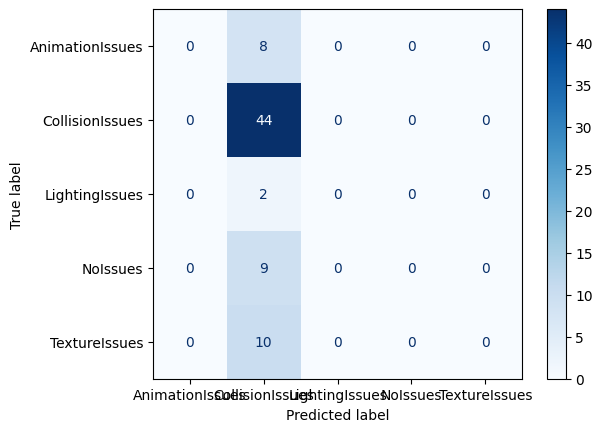

Precision: 0.3633
Recall: 0.6027
F1 Score: 0.4533


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import LeakyReLU
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate, units):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:-4]:
      layer.trainable = True

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(units, kernel_regularizer=regularizers.l2(0.0001)),
      LeakyReLU(alpha=0.01),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.4),
      layers.Dense(units // 2, kernel_regularizer=regularizers.l2(0.0001)),
      LeakyReLU(alpha=0.01),
      layers.BatchNormalization(),
      layers.Dropout(0.4),
      layers.Dense(units // 4, kernel_regularizer=regularizers.l2(0.0001)),
      LeakyReLU(alpha=0.01),
      layers.Dropout(0.4),
      layers.Dense(units // 4),
      LeakyReLU(alpha=0.01),
      layers.Dropout(0.4),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsAdamV4.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


batch_sizes = [64]
epochs_list = [50]
optimizers = ['Adam']
learning_rates = [0.001]
units = [1024]
param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates, 'units_per_layer': units}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    units_per_layer = params['units_per_layer']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate, units_per_layer)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback, reduce_lr, early_stopping]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdamV4.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Now try to get the best model and add early stopping and lr scheduler:

Training with params: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'optimizer': 'Adam'}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 4.7303 - accuracy: 0.4448
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsADAMFinal.h5
19/19 [==============================] - 34s 2s/step - loss: 4.7303 - accuracy: 0.4448 - val_loss: 10.2911 - val_accuracy: 0.5909
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 4.3849 - accuracy: 0.4737
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 4.3849 - accuracy: 0.4737 - val_loss: 9.8309 - val_a

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

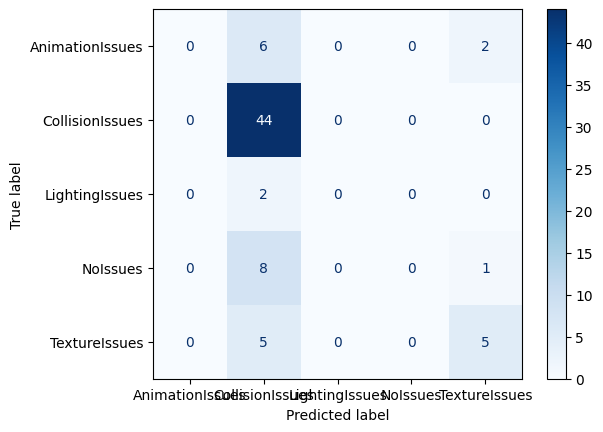

Precision: 0.4936
Recall: 0.6712
F1 Score: 0.5627
Best params: {'batch_size': 32, 'epochs': 50, 'learning_rate': 0.001, 'optimizer': 'Adam'}, Best validation accuracy: 0.6666666865348816
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}


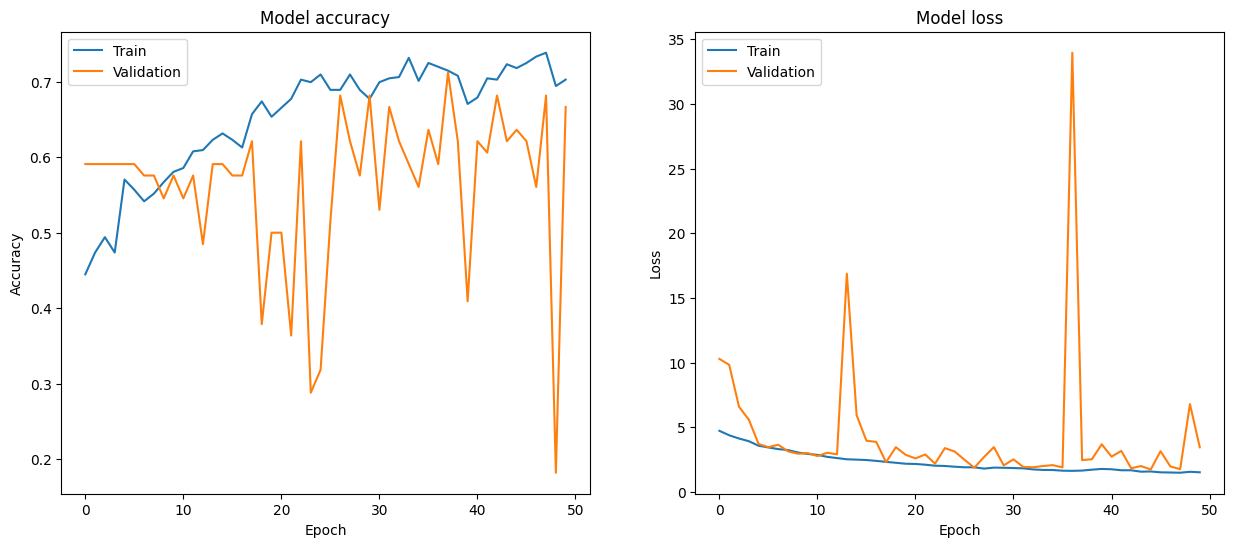

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:14]:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsADAMFinal.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

batch_sizes = [32]
epochs_list = [50]
optimizers = ['Adam']
learning_rates = [0.001]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params

    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    test_generator.reset()
    # Predict the values from the test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=class_names))
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(15, 25))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")




print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

#best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsRMSprop.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss, accuracy = best_model.evaluate(test_generator)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")
# print(f"Test Loss: {loss:.4f}")

# test_generator.reset()
# # Predict the values from the test set
# Y_pred = best_model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# y_true = test_generator.classes
# class_names = list(test_generator.class_indices.keys())

# # Print classification report
# print(classification_report(y_true, y_pred, target_names=class_names))

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# # Plot confusion matrix
# plt.figure(figsize=(15, 25))
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # Compute precision, recall, and F1 score
# precision = precision_score(y_true, y_pred, average='weighted')
# recall = recall_score(y_true, y_pred, average='weighted')
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.0001, 'optimizer': 'Adam'}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/40
19/19 [==============================] - ETA: 0s - loss: 31.0897 - accuracy: 0.2462
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsADAMFinal.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 34s 2s/step - loss: 31.0897 - accuracy: 0.2462 - val_loss: 28.6420 - val_accuracy: 0.5909
Epoch 2/40
19/19 [==============================] - ETA: 0s - loss: 28.2668 - accuracy: 0.4635
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 28.2668 - accuracy: 0.4635 - val_loss: 27.1238 - val_accuracy: 0.5909
Epoch 3/40
19/19 [==============================] - ETA: 0s - loss: 26.6130 - accuracy: 0.5076
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 26.6130 - accuracy: 0.5076 - val_loss: 25.4927 - val_accuracy: 0.5909
Epoch 4/40
19/19 [==============================] - ETA: 0s - loss: 25.2708 - accuracy: 0.5212
Epoch 4: val_accuracy did not improve from 0.59091
19/19 [==============================] - 30s 2s/step - loss: 25.2708 - accuracy: 0.5212 - val_loss: 24.5430 - val_accuracy: 0.5909
Epoch 5/40
19/19 [====================

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

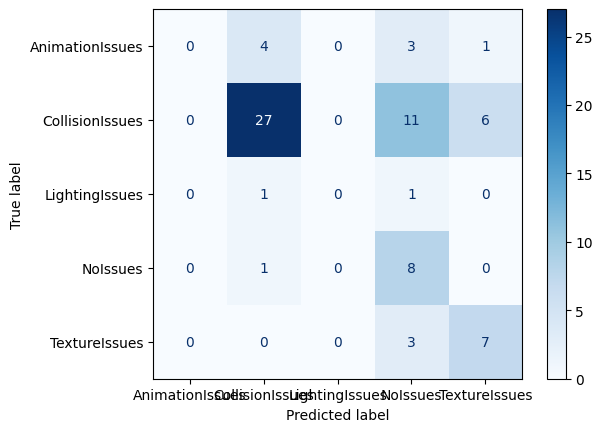

Precision: 0.5996
Recall: 0.5753
F1 Score: 0.5590
Best params: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.0001, 'optimizer': 'Adam'}, Best validation accuracy: 0.6515151262283325
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}


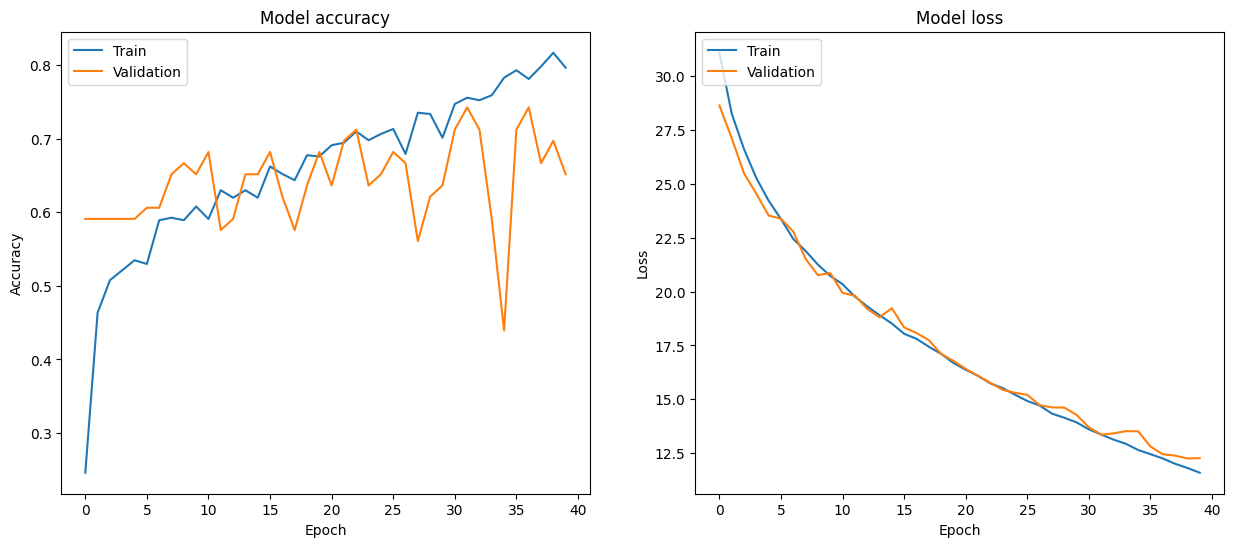

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:14]:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.5),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsADAMFinal.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

batch_sizes = [32]
epochs_list = [40]
optimizers = ['Adam']
learning_rates = [0.0001]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params

    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    test_generator.reset()
    # Predict the values from the test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=class_names))
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(15, 25))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")




print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

#best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsRMSprop.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss, accuracy = best_model.evaluate(test_generator)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")
# print(f"Test Loss: {loss:.4f}")

# test_generator.reset()
# # Predict the values from the test set
# Y_pred = best_model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# y_true = test_generator.classes
# class_names = list(test_generator.class_indices.keys())

# # Print classification report
# print(classification_report(y_true, y_pred, target_names=class_names))

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# # Plot confusion matrix
# plt.figure(figsize=(15, 25))
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # Compute precision, recall, and F1 score
# precision = precision_score(y_true, y_pred, average='weighted')
# recall = recall_score(y_true, y_pred, average='weighted')
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.0001, 'optimizer': 'Adam'}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
58889256/58889256 [==============================] - 0s 0us/step
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/40
19/19 [==============================] - ETA: 0s - loss: 5.8500 - accuracy: 0.5535 
Epoch 1: val_accuracy improved from -inf to 0.59091, saving model to best_vgg16model32batch20epochsADAMFinal.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 639s 33s/step - loss: 5.8500 - accuracy: 0.5535 - val_loss: 5.2060 - val_accuracy: 0.5909
Epoch 2/40
19/19 [==============================] - ETA: 0s - loss: 4.7631 - accuracy: 0.5891 
Epoch 2: val_accuracy did not improve from 0.59091
19/19 [==============================] - 641s 34s/step - loss: 4.7631 - accuracy: 0.5891 - val_loss: 4.2255 - val_accuracy: 0.5909
Epoch 3/40
19/19 [==============================] - ETA: 0s - loss: 3.9471 - accuracy: 0.5891 
Epoch 3: val_accuracy did not improve from 0.59091
19/19 [==============================] - 640s 34s/step - loss: 3.9471 - accuracy: 0.5891 - val_loss: 3.5078 - val_accuracy: 0.5909
Epoch 4/40
19/19 [==============================] - ETA: 0s - loss: 3.2812 - accuracy: 0.6010 
Epoch 4: val_accuracy improved from 0.59091 to 0.69697, saving model to best_vgg16model32batch20epochsADAMFinal.h5
19/19 [==============================] - 640s 34s/step - loss: 3.2812 - accuracy: 0.6010 - val_loss: 2.90

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

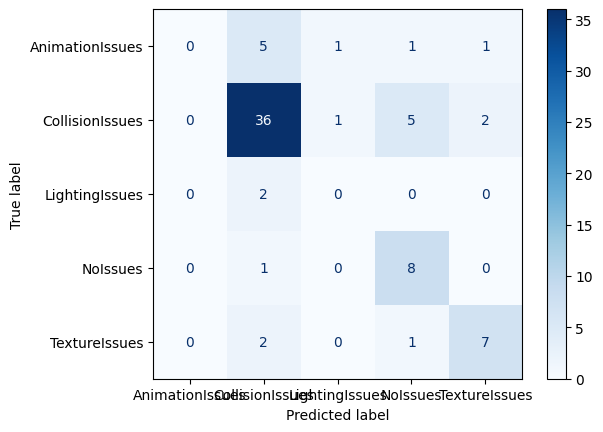

Precision: 0.6334
Recall: 0.6986
F1 Score: 0.6603
Best params: {'batch_size': 32, 'epochs': 40, 'learning_rate': 0.0001, 'optimizer': 'Adam'}, Best validation accuracy: 0.7424242496490479
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}


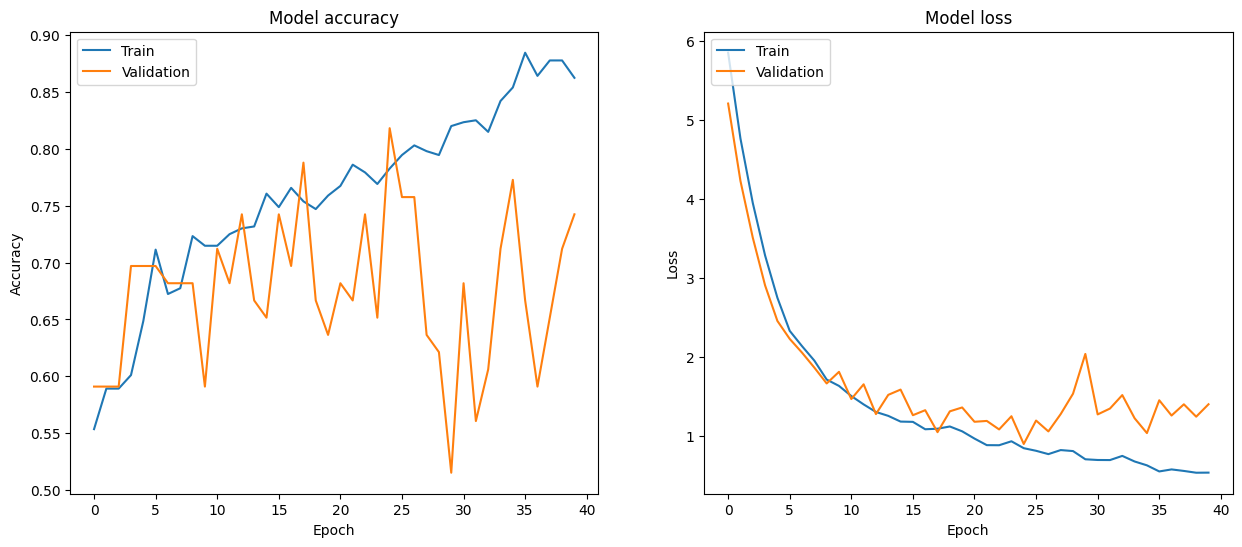

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers, regularizers
from keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model(optimizer, learning_rate):
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:12]:
      layer.trainable = False

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  if(optimizer == 'SGD'):
      chosen_optimizer = SGD(learning_rate=learning_rate)
  elif(optimizer == 'RMSprop'):
      chosen_optimizer = RMSprop(learning_rate=learning_rate)
  else: chosen_optimizer = Adam(learning_rate=learning_rate)

  model.compile(optimizer=chosen_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.vgg16.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_vgg16model32batch20epochsADAMFinal.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

batch_sizes = [32]
epochs_list = [40]
optimizers = ['Adam']
learning_rates = [0.0001]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list, 'optimizer': optimizers, 'learning_rate': learning_rates}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    optimizer = params['optimizer']
    learning_rate = params['learning_rate']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model(optimizer, learning_rate)

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params

    loss, accuracy = model.evaluate(test_generator)
    print(f"Test Accuracy: {accuracy * 100:.2f}%")
    print(f"Test Loss: {loss:.4f}")

    test_generator.reset()
    # Predict the values from the test set
    Y_pred = model.predict(test_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = test_generator.classes
    class_names = list(test_generator.class_indices.keys())

    # Print classification report
    print(classification_report(y_true, y_pred, target_names=class_names))
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

    # Plot confusion matrix
    plt.figure(figsize=(15, 25))
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

    # Compute precision, recall, and F1 score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")




print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']
best_optimizer = best_params['optimizer']
best_learning_rate = best_params['learning_rate']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

#best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsRMSprop.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss, accuracy = best_model.evaluate(test_generator)
# print(f"Test Accuracy: {accuracy * 100:.2f}%")
# print(f"Test Loss: {loss:.4f}")

# test_generator.reset()
# # Predict the values from the test set
# Y_pred = best_model.predict(test_generator)
# y_pred = np.argmax(Y_pred, axis=1)
# y_true = test_generator.classes
# class_names = list(test_generator.class_indices.keys())

# # Print classification report
# print(classification_report(y_true, y_pred, target_names=class_names))

# # Compute confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# # Plot confusion matrix
# plt.figure(figsize=(15, 25))
# disp.plot(cmap=plt.cm.Blues)
# plt.show()

# # Compute precision, recall, and F1 score
# precision = precision_score(y_true, y_pred, average='weighted')
# recall = recall_score(y_true, y_pred, average='weighted')
# f1 = f1_score(y_true, y_pred, average='weighted')

# print(f"Precision: {precision:.4f}")
# print(f"Recall: {recall:.4f}")
# print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

3/3 [==============================] - 3s 732ms/step - loss: 4.9039 - accuracy: 0.7123
Test Accuracy: 71.23%
Test Loss: 4.9039
3/3 [==============================] - 3s 759ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.81      0.86      0.84        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.89      0.64         9
  TextureIssues       0.60      0.60      0.60        10

       accuracy                           0.71        73
      macro avg       0.38      0.47      0.42        73
   weighted avg       0.63      0.71      0.66        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

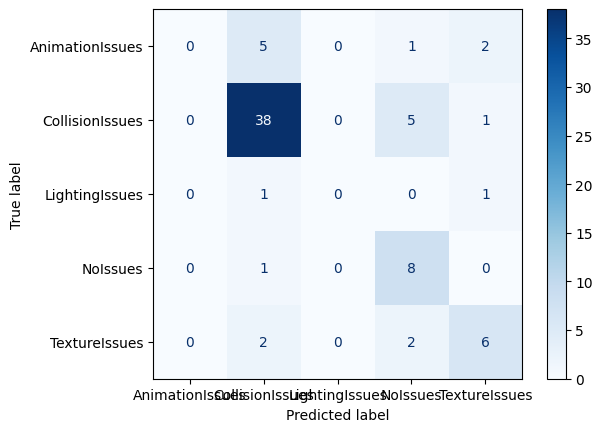

Precision: 0.6312
Recall: 0.7123
F1 Score: 0.6645


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
best_model = tf.keras.models.load_model('best_vgg16model32batch20epochsAdamV2.h5')

#test_generator.reset()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Now switch to ResNet50 model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_2 (Flatten)         (None, 100352)            0         
                                                                 
 dense_4 (Dense)             (None, 512)               51380736  
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 74971013 (285.99 MB)
Trainable params: 51383301 (196.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________
Foun

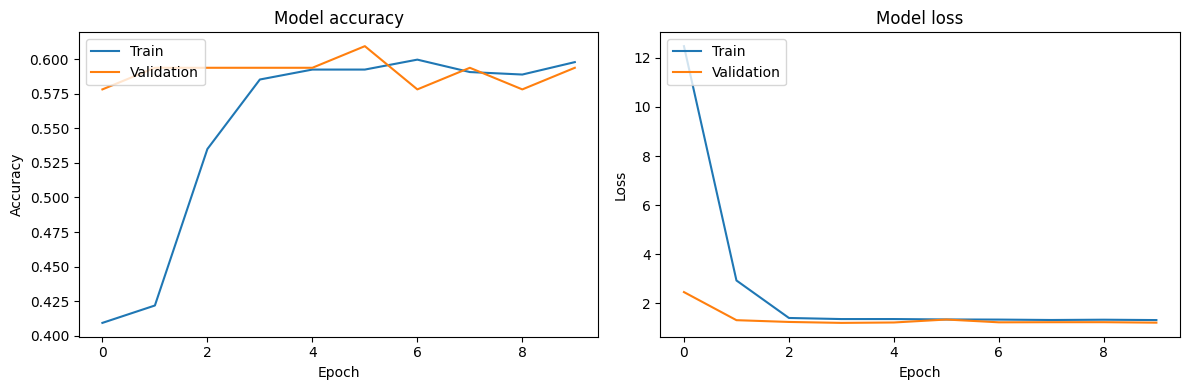

3/3 [==============================] - 4s 1s/step


NameError: name 'np' is not defined

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=tf.keras.applications.resnet.preprocess_input)

validation_datagen = ImageDataGenerator(
    rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)
#/content/sample_data/dataset/train
train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=32, class_mode='categorical', classes=classes)
validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=32, class_mode='categorical', classes=classes)
test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=32, class_mode='categorical', shuffle=False, classes=classes)

print(train_generator.class_indices)

#Training:
epochs = 10
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // 32,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // 32
)

loss, accuracy = model.evaluate(test_generator, steps=test_generator.samples // 32)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

test_generator.reset()
Y_pred = model.predict(test_generator, test_generator.samples // 32 + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred, target_names=classes)
print(report)

# Precision, Recall, F1 Score
#precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='macro')
#print(f'Precision: {precision}')
#print(f'Recall: {recall}')
#print(f'F1 Score: {f1_score}')

#Save the model:
#model.save('model1_VGG.h5')

Now perform grid search for batch_sizes and epochs:

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers:
      layer.trainable = False

  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochs.keras',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [32, 64, 128]
epochs_list = [20, 50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochs.keras')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_5 (Flatten)         (None, 100352)            0         
                                                                 
 dense_10 (Dense)            (None, 512)               51380736  
                                                                 
 dropout_5 (Dropout)         (None, 512)    

ValueError: Unexpected value for `steps_per_epoch`. Received value is 0. Please check the docstring for `model.fit()` for supported values.

Best epochs: 50, batch_size: 64
Now add more layers to the model so it can learn better

Training with params: {'batch_size': 64, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
94765736/94765736 [==============================] - 5s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 1024)              102761472 
                                               

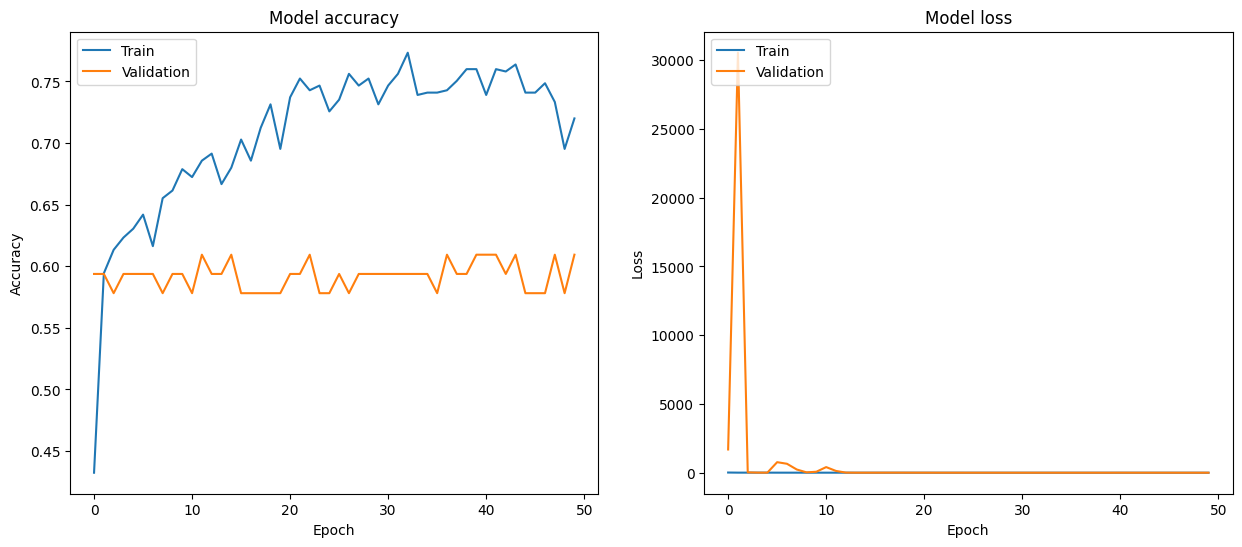

2/2 [==============================] - 5s 1s/step - loss: 133.8634 - accuracy: 0.6027
Test Accuracy: 60.27%
Test Loss: 133.8634
2/2 [==============================] - 3s 412ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.60      1.00      0.75        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.00      0.00      0.00        10

       accuracy                           0.60        73
      macro avg       0.12      0.20      0.15        73
   weighted avg       0.36      0.60      0.45        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

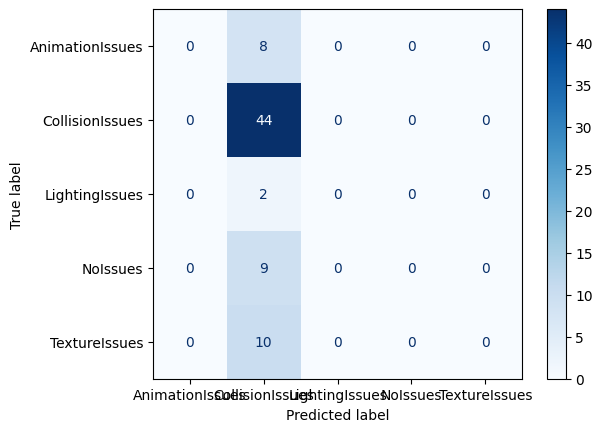

Precision: 0.3633
Recall: 0.6027
F1 Score: 0.4533


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:-15]:
      layer.trainable = True

  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV2.keras',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [64]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV2.keras')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 64, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 100352)            0         
                                                                 
 dense_3 (Dense)             (None, 1024)              102761472 
                                                                 
 dropout_2 (Dropout)         (None, 1024)   

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


9/9 [==============================] - 114s 11s/step - loss: 31.0787 - accuracy: 0.4800 - val_loss: 27.8581 - val_accuracy: 0.5938
Epoch 2/50
9/9 [==============================] - ETA: 0s - loss: 29.8884 - accuracy: 0.4248
Epoch 2: val_accuracy did not improve from 0.59375
9/9 [==============================] - 93s 10s/step - loss: 29.8884 - accuracy: 0.4248 - val_loss: 27.9847 - val_accuracy: 0.5938
Epoch 3/50
9/9 [==============================] - ETA: 0s - loss: 28.6789 - accuracy: 0.5143 
Epoch 3: val_accuracy did not improve from 0.59375
9/9 [==============================] - 91s 11s/step - loss: 28.6789 - accuracy: 0.5143 - val_loss: 27.9535 - val_accuracy: 0.5781
Epoch 4/50
9/9 [==============================] - ETA: 0s - loss: 27.6184 - accuracy: 0.5790
Epoch 4: val_accuracy did not improve from 0.59375
9/9 [==============================] - 93s 10s/step - loss: 27.6184 - accuracy: 0.5790 - val_loss: 27.8466 - val_accuracy: 0.5781
Epoch 5/50
9/9 [==============================

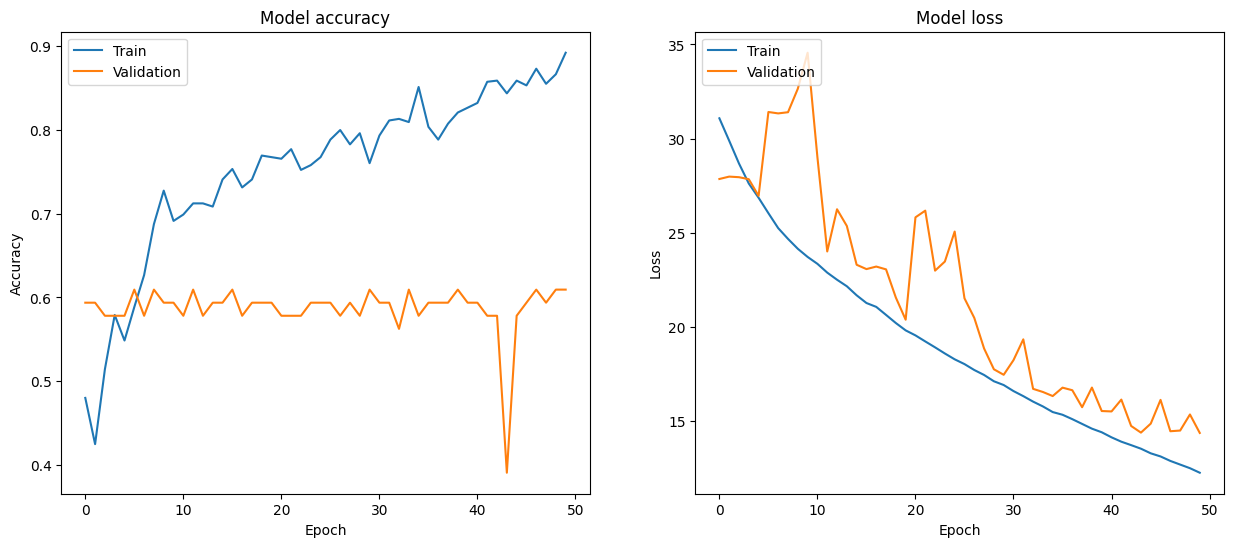

2/2 [==============================] - 5s 323ms/step - loss: 31.5608 - accuracy: 0.6027
Test Accuracy: 60.27%
Test Loss: 31.5608
2/2 [==============================] - 5s 294ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.60      1.00      0.75        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.00      0.00      0.00        10

       accuracy                           0.60        73
      macro avg       0.12      0.20      0.15        73
   weighted avg       0.36      0.60      0.45        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

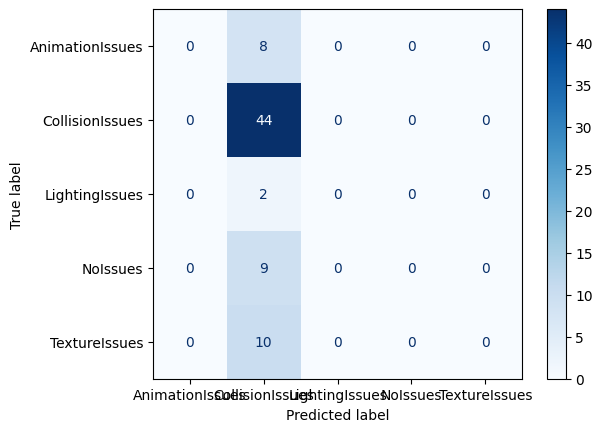

Precision: 0.3633
Recall: 0.6027
F1 Score: 0.4533


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  for layer in base_model.layers[:-15]:
      layer.trainable = True

  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.4,
      zoom_range=0.4,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      rescale=1./255,
      horizontal_flip=True,
      vertical_flip=True)

    test_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV3.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [64]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV3.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad1546e3730>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad1429d0b80>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad1429d2b60>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad18c7985e0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad154589240>
Layer unfrozen:  <keras.

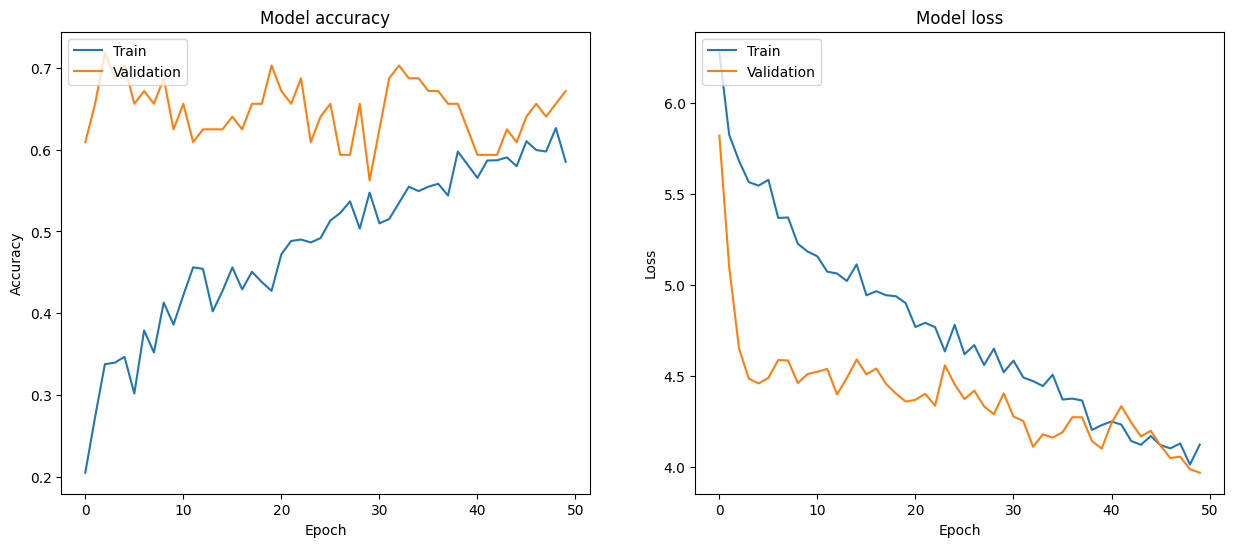

3/3 [==============================] - 7s 1s/step - loss: 4.4439 - accuracy: 0.6986
Test Accuracy: 69.86%
Test Loss: 4.4439
3/3 [==============================] - 6s 1s/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.85      0.89      0.87        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.44      0.47         9
  TextureIssues       0.62      0.80      0.70        10

       accuracy                           0.70        73
      macro avg       0.39      0.43      0.41        73
   weighted avg       0.66      0.70      0.68        73



<Figure size 1500x2500 with 0 Axes>

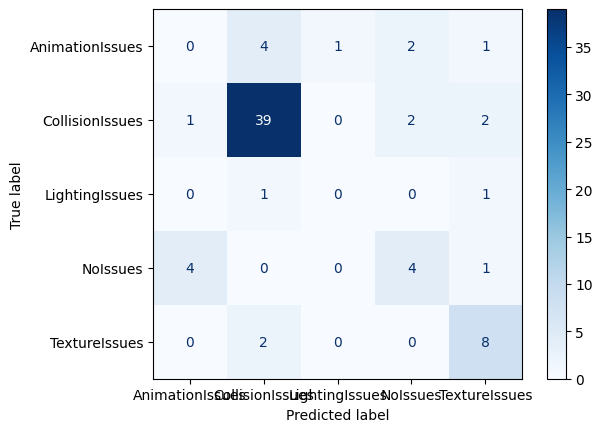

Precision: 0.6570
Recall: 0.6986
F1 Score: 0.6757


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  #for layer in base_model.layers[:-15]:
  #    layer.trainable = True

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True



  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Dropout(0.6),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=tf.keras.applications.resnet.preprocess_input
      )

    test_datagen = ImageDataGenerator(
        #rescale=1./255
        preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV3.keras',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV3.keras')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad12445bac0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad1415a9690>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad1415ab610>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad141cf2770>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad141cf2590>
Layer unfrozen:  <keras.

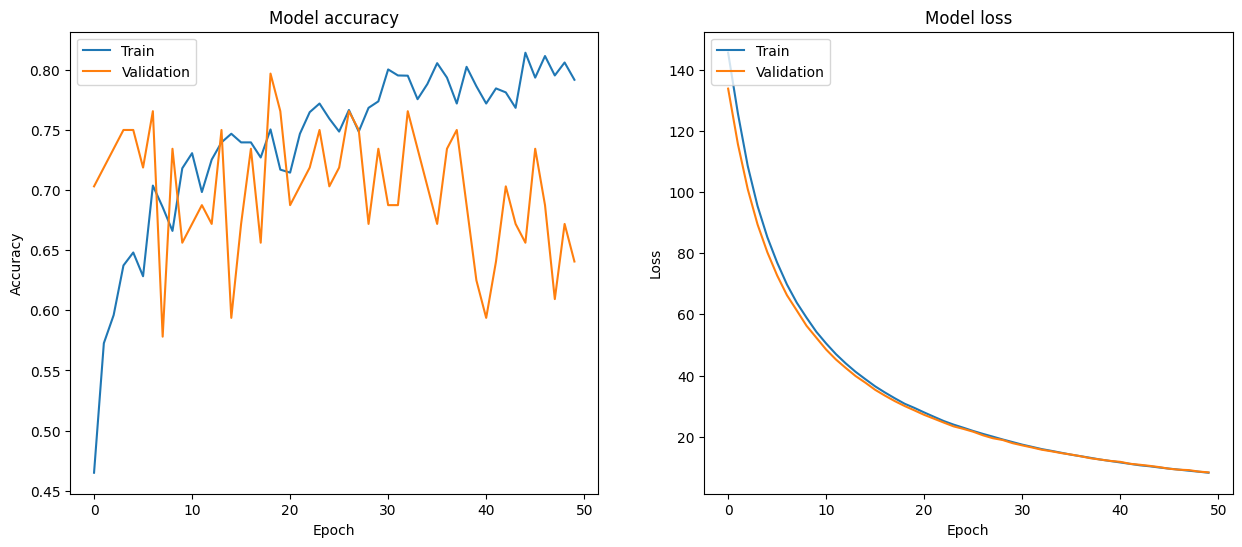

3/3 [==============================] - 7s 1s/step - loss: 30.0371 - accuracy: 0.7808
Test Accuracy: 78.08%
Test Loss: 30.0371
3/3 [==============================] - 6s 1s/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.75      0.95      0.84        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.78      0.78      0.78         9
  TextureIssues       1.00      0.80      0.89        10

       accuracy                           0.78        73
      macro avg       0.51      0.51      0.50        73
   weighted avg       0.68      0.78      0.72        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

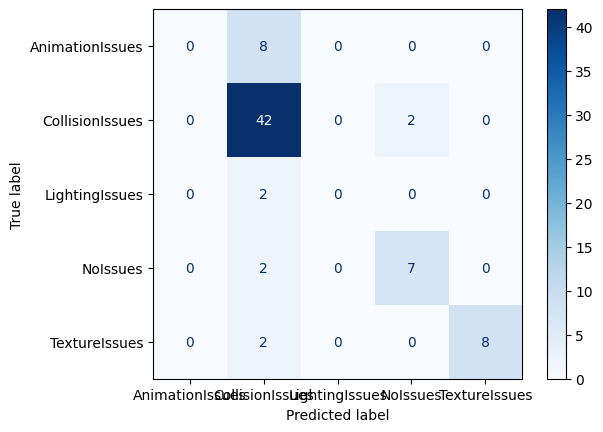

Precision: 0.6849
Recall: 0.7808
F1 Score: 0.7240


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  #for layer in base_model.layers[:-15]:
  #    layer.trainable = True

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True



  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    #layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.1)),
    #layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=tf.keras.applications.resnet.preprocess_input
      )

    test_datagen = ImageDataGenerator(
        #rescale=1./255
        preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV4.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV4.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad12748e230>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad1263b05b0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad141ef35e0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad12658d390>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7ad141cf2080>
Layer unfrozen:  <keras.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 63s 3s/step - loss: 18.0434 - accuracy: 0.4345 - val_loss: 15.9883 - val_accuracy: 0.6562
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 17.3997 - accuracy: 0.4022
Epoch 2: val_accuracy improved from 0.65625 to 0.67188, saving model to best_resnet50model32batch20epochsV4.h5
18/18 [==============================] - 53s 3s/step - loss: 17.3997 - accuracy: 0.4022 - val_loss: 15.5095 - val_accuracy: 0.6719
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 16.1492 - accuracy: 0.4794
Epoch 3: val_accuracy improved from 0.67188 to 0.68750, saving model to best_resnet50model32batch20epochsV4.h5
18/18 [==============================] - 53s 3s/step - loss: 16.1492 - accuracy: 0.4794 - val_loss: 15.0209 - val_accuracy: 0.6875
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 15.5307 - accuracy: 0.5171
Epoch 4: val_accuracy did not improve from 0.68750
18/18 [==============================] - 52s 3s/s

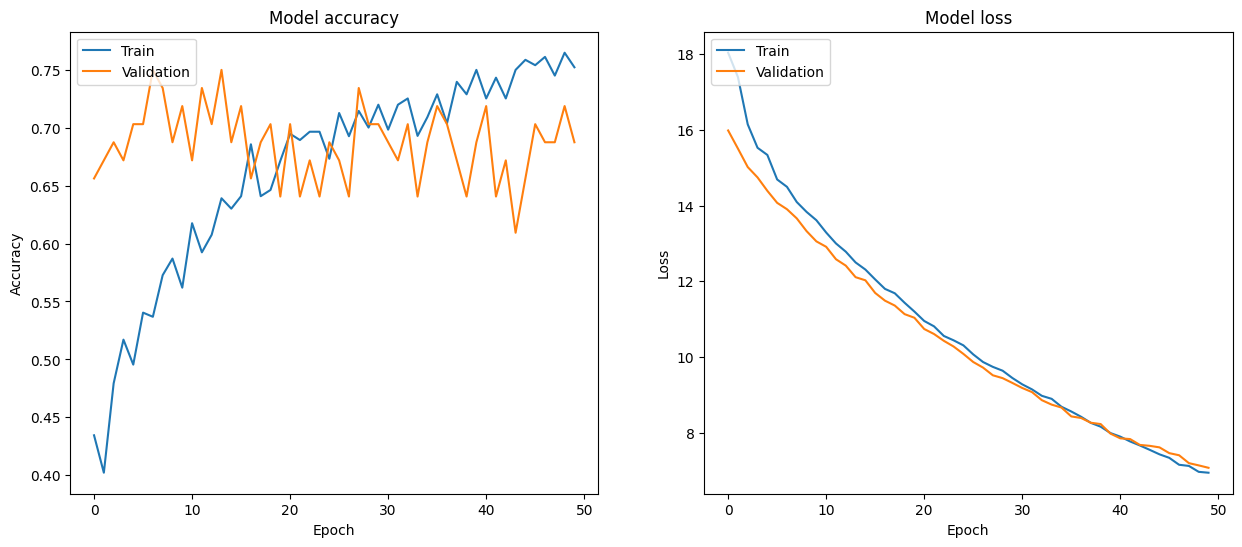

3/3 [==============================] - 7s 1s/step - loss: 13.8194 - accuracy: 0.7534
Test Accuracy: 75.34%
Test Loss: 13.8194
3/3 [==============================] - 6s 1s/step
                 precision    recall  f1-score   support

AnimationIssues       0.60      0.38      0.46         8
CollisionIssues       0.75      0.95      0.84        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.67      0.44      0.53         9
  TextureIssues       1.00      0.60      0.75        10

       accuracy                           0.75        73
      macro avg       0.60      0.47      0.52        73
   weighted avg       0.74      0.75      0.73        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

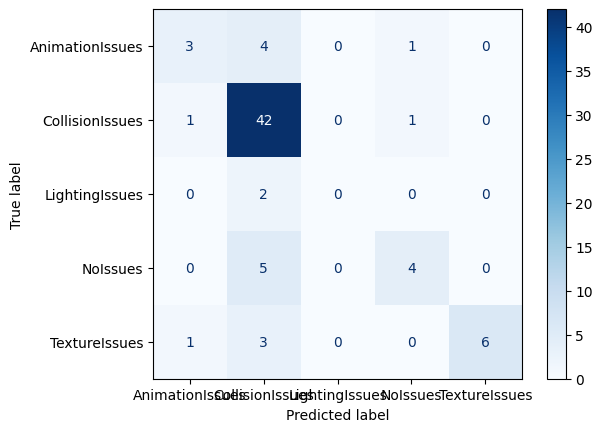

Precision: 0.7370
Recall: 0.7534
F1 Score: 0.7254


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  #for layer in base_model.layers[:-15]:
  #    layer.trainable = True

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True



  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=tf.keras.applications.resnet.preprocess_input
      )

    test_datagen = ImageDataGenerator(
        #rescale=1./255
        preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV4.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV4.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Add more dropout and less units per layer or erase an entire layer

Training with params: {'batch_size': 32, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
94765736/94765736 [==============================] - 4s 0us/step
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f077870ab30>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1ce46a0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1ce6b60>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f0778715c90>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.Batc

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 53s 3s/step - loss: 10.0632 - accuracy: 0.4327 - val_loss: 8.6003 - val_accuracy: 0.6562
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 9.3932 - accuracy: 0.4774
Epoch 2: val_accuracy improved from 0.65625 to 0.67188, saving model to best_resnet50model32batch20epochsV4.h5
18/18 [==============================] - 48s 3s/step - loss: 9.3932 - accuracy: 0.4774 - val_loss: 8.3655 - val_accuracy: 0.6719
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 8.9022 - accuracy: 0.4883
Epoch 3: val_accuracy did not improve from 0.67188
18/18 [==============================] - 45s 3s/step - loss: 8.9022 - accuracy: 0.4883 - val_loss: 8.3184 - val_accuracy: 0.6406
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 8.6307 - accuracy: 0.5135
Epoch 4: val_accuracy improved from 0.67188 to 0.71875, saving model to best_resnet50model32batch20epochsV4.h5
18/18 [==============================] - 46s 2s/step - lo

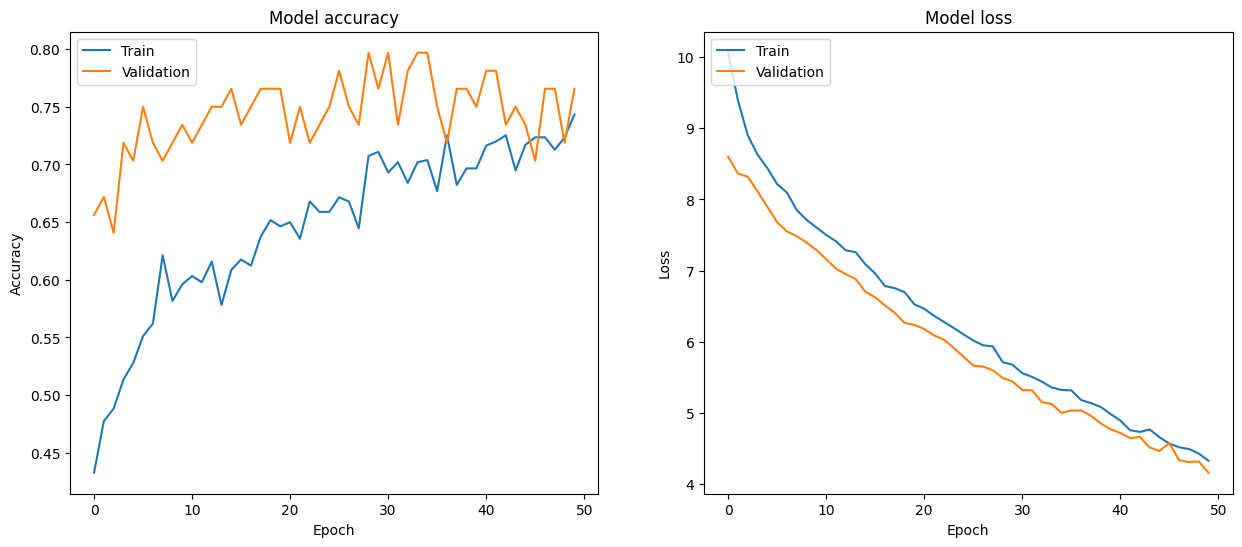

3/3 [==============================] - 6s 921ms/step - loss: 5.5177 - accuracy: 0.7397
Test Accuracy: 73.97%
Test Loss: 5.5177
3/3 [==============================] - 6s 887ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.78      0.86      0.82        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.53      0.89      0.67         9
  TextureIssues       0.89      0.80      0.84        10

       accuracy                           0.74        73
      macro avg       0.44      0.51      0.47        73
   weighted avg       0.65      0.74      0.69        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

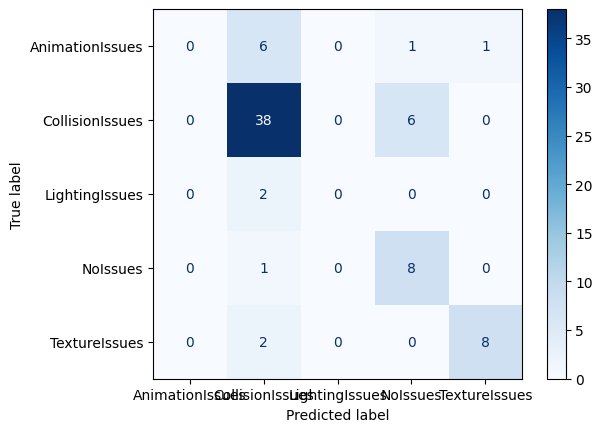

Precision: 0.6549
Recall: 0.7397
F1 Score: 0.6901


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  #for layer in base_model.layers[:-15]:
  #    layer.trainable = True

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True



  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=tf.keras.applications.resnet.preprocess_input
      )

    test_datagen = ImageDataGenerator(
        #rescale=1./255
        preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV4.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV4.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Number of images in the train folder:
NoIssues: 74
CollisionIssues: 350
TextureIssues: 81
LightingIssues: 17
AnimationIssues: 67
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06acc7bfa0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1be17b0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1be2950>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1c35510>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1a866e0>
Layer unfrozen:  <keras.

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 55s 3s/step - loss: 10.8657 - accuracy: 0.3806 - val_loss: 8.6193 - val_accuracy: 0.5000
Epoch 2/50
18/18 [==============================] - ETA: 0s - loss: 9.5542 - accuracy: 0.4147
Epoch 2: val_accuracy improved from 0.50000 to 0.54688, saving model to best_resnet50model32batch20epochsV4.h5
18/18 [==============================] - 48s 3s/step - loss: 9.5542 - accuracy: 0.4147 - val_loss: 8.3272 - val_accuracy: 0.5469
Epoch 3/50
18/18 [==============================] - ETA: 0s - loss: 8.7365 - accuracy: 0.4183
Epoch 3: val_accuracy improved from 0.54688 to 0.59375, saving model to best_resnet50model32batch20epochsV4.h5
18/18 [==============================] - 48s 3s/step - loss: 8.7365 - accuracy: 0.4183 - val_loss: 8.2491 - val_accuracy: 0.5938
Epoch 4/50
18/18 [==============================] - ETA: 0s - loss: 8.5050 - accuracy: 0.4618
Epoch 4: val_accuracy did not improve from 0.59375
18/18 [==============================] - 47s 3s/step - lo

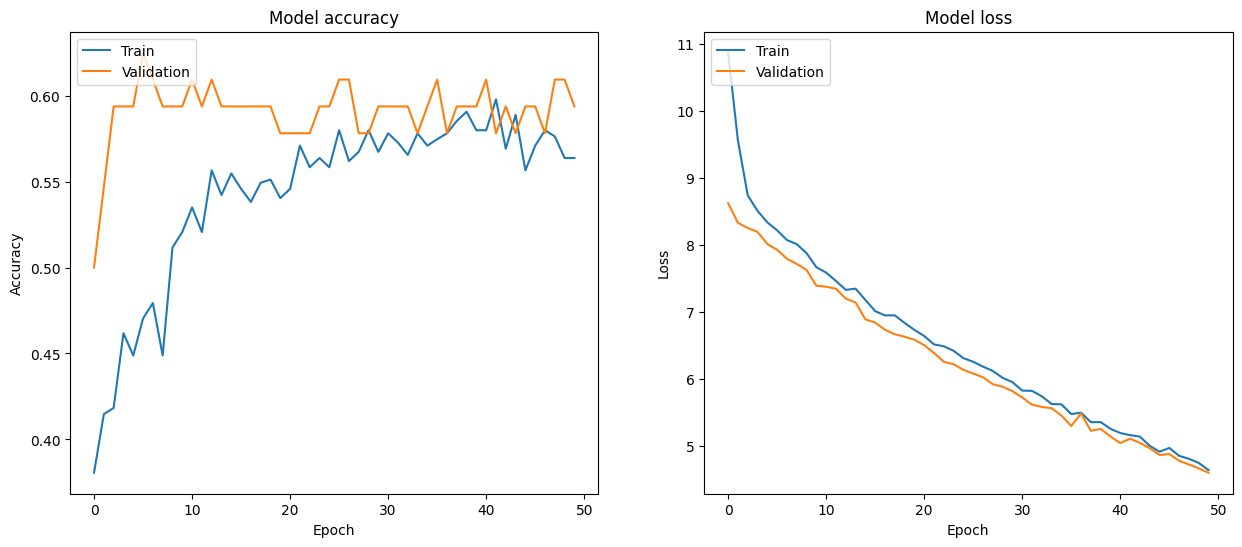

3/3 [==============================] - 6s 939ms/step - loss: 7.8916 - accuracy: 0.6027
Test Accuracy: 60.27%
Test Loss: 7.8916
3/3 [==============================] - 7s 962ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.61      1.00      0.76        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.00      0.00      0.00        10

       accuracy                           0.60        73
      macro avg       0.12      0.20      0.15        73
   weighted avg       0.37      0.60      0.46        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

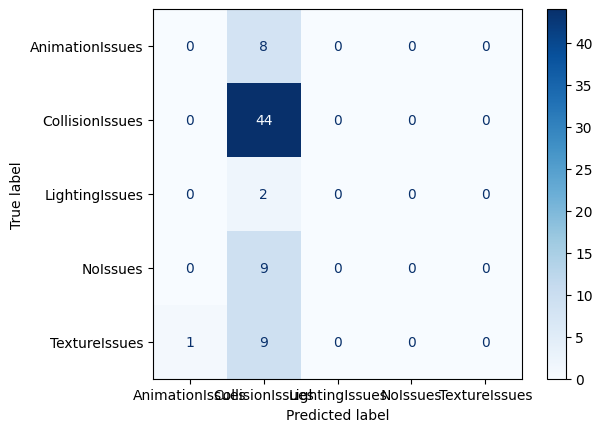

Precision: 0.3683
Recall: 0.6027
F1 Score: 0.4573


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

  #for layer in base_model.layers[:-15]:
  #    layer.trainable = True

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True



  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    #layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      #vertical_flip=True,
      fill_mode='nearest',
      preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    validation_datagen = ImageDataGenerator(
      #rescale=1./255,
      preprocessing_function=tf.keras.applications.resnet.preprocess_input
      )

    test_datagen = ImageDataGenerator(
        #rescale=1./255
        preprocessing_function=tf.keras.applications.resnet.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(224, 224), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    print('Number of images in the train folder:')
    print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback

checkpoint_callback = ModelCheckpoint(
    filepath='best_resnet50model32batch20epochsV4.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()


def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= train_generator.samples // batch_size,
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples // batch_size,
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_resnet50model32batch20epochsV4.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Now we switch to the third model, in our case InceptionV3

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
87910968/87910968 [==============================] - 4s 0us/step
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06e1b28730>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06acc79000>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06acadc8e0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06acade710>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f06a4231fc0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 83s 4s/step - loss: 2.1118 - accuracy: 0.5212 - val_loss: 5.4366 - val_accuracy: 0.5909
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 1.9443 - accuracy: 0.5959
Epoch 2: val_accuracy improved from 0.59091 to 0.62121, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 69s 4s/step - loss: 1.9443 - accuracy: 0.5959 - val_loss: 4.8718 - val_accuracy: 0.6212
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 1.9244 - accuracy: 0.6231
Epoch 3: val_accuracy did not improve from 0.62121
19/19 [==============================] - 66s 3s/step - loss: 1.9244 - accuracy: 0.6231 - val_loss: 3.4371 - val_accuracy: 0.5909
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 1.8561 - accuracy: 0.6316
Epoch 4: val_accuracy did not improve from 0.62121
19/19 [==============================] - 67s 3s/step - loss: 1.8561 - accuracy: 0.6316 - val_loss: 2.0699 - val_accuracy

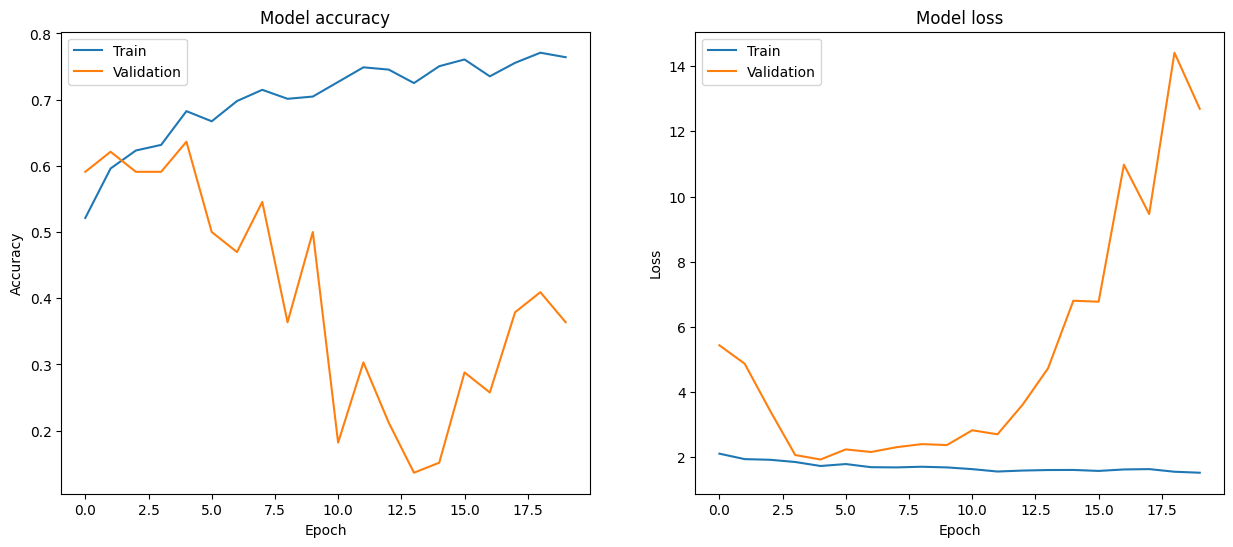

3/3 [==============================] - 7s 1s/step - loss: 1.8838 - accuracy: 0.6301
Test Accuracy: 63.01%
Test Loss: 1.8838
3/3 [==============================] - 7s 1s/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.69      0.95      0.80        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.50      0.11      0.18         9
  TextureIssues       0.60      0.30      0.40        10

       accuracy                           0.63        73
      macro avg       0.36      0.27      0.28        73
   weighted avg       0.56      0.63      0.56        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

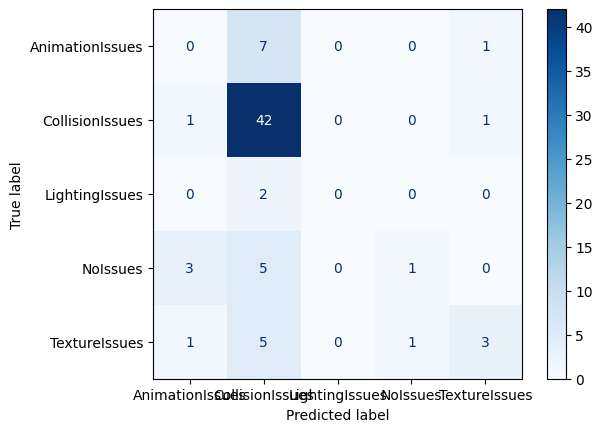

Precision: 0.5588
Recall: 0.6301
F1 Score: 0.5594


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.3),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
      layers.Dropout(0.3),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    validation_datagen = ImageDataGenerator(
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_inception_v3_32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_inception_v3_32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Increase l2 reg from 0.0001 to 0.001 and reducing the units per layer, and more dropout

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f067fbf7e50>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f067c1bf2b0>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f067c1bf220>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f067c193250>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f067c193130>
Layer unfrozen:  <keras.src.layers.normalization.batch_normalization.BatchNormalization object at 0x7f067c196f80>
Layer unfrozen:  <keras.src.layers.norm

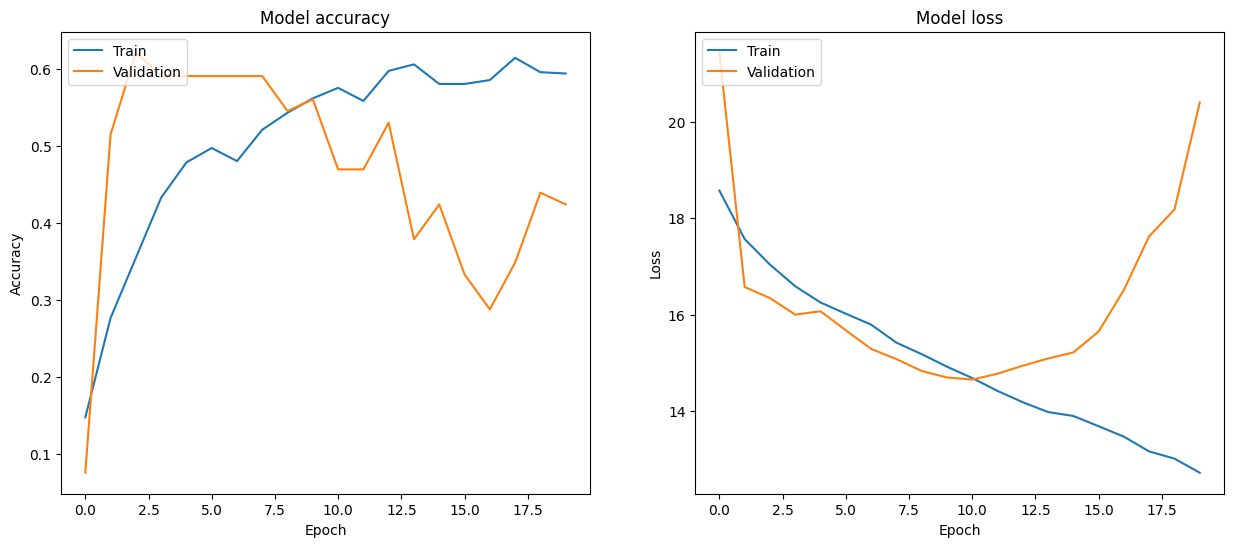

3/3 [==============================] - 7s 1s/step - loss: 16.1850 - accuracy: 0.6712
Test Accuracy: 67.12%
Test Loss: 16.1850


3/3 [==============================] - 7s 1s/step
                 precision    recall  f1-score   support

AnimationIssues       0.50      0.12      0.20         8
CollisionIssues       0.68      1.00      0.81        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       1.00      0.11      0.20         9
  TextureIssues       0.60      0.30      0.40        10

       accuracy                           0.67        73
      macro avg       0.56      0.31      0.32        73
   weighted avg       0.67      0.67      0.59        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

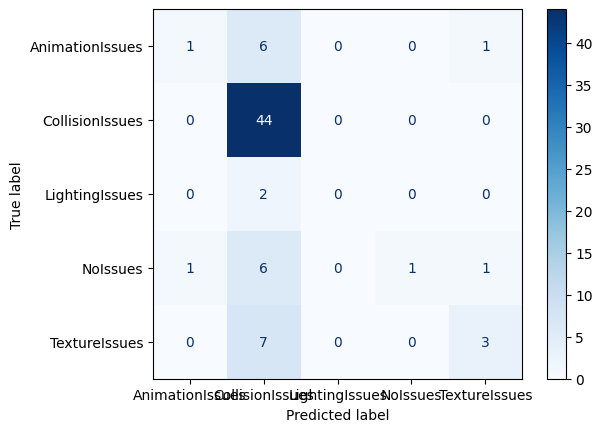

Precision: 0.6683
Recall: 0.6712
F1 Score: 0.5880


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

  base_model.trainable = False

  for layer in base_model.layers:
      if "BatchNormalization" in layer.__class__.__name__:
          print("Layer unfrozen: ", layer)
          layer.trainable = True

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.BatchNormalization(),  # Add BatchNormalization here
      layers.Dropout(0.5),
      layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax')
  ])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    validation_datagen = ImageDataGenerator(
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_inception_v3_32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

seed = 7
np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_inception_v3_32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 50}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 23.1611 - accuracy: 0.4109
Epoch 1: val_accuracy improved from -inf to 0.13636, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 52s 3s/step - loss: 23.1611 - accuracy: 0.4109 - val_loss: 34.5925 - val_accuracy: 0.1364
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 15.6100 - accuracy: 0.4007
Epoch 2: val_accuracy improved from 0.13636 to 0.19697, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 42s 2s/step - loss: 15.6100 - accuracy: 0.4007 - val_loss: 5.9

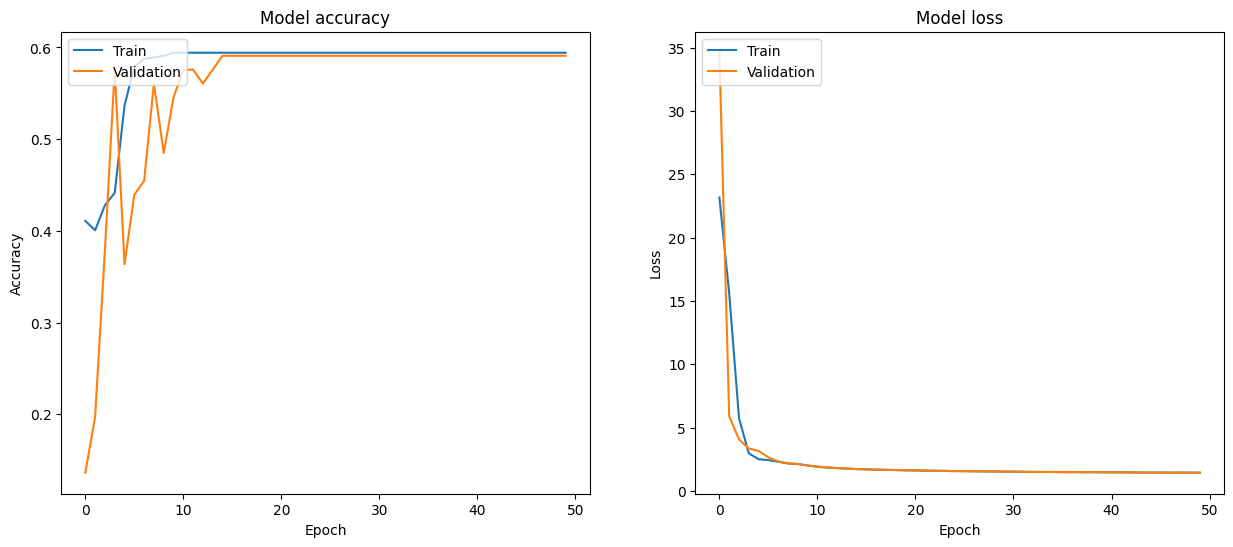

3/3 [==============================] - 7s 2s/step - loss: 1.7291 - accuracy: 0.6027
Test Accuracy: 60.27%
Test Loss: 1.7291
3/3 [==============================] - 4s 804ms/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.60      1.00      0.75        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.00      0.00      0.00        10

       accuracy                           0.60        73
      macro avg       0.12      0.20      0.15        73
   weighted avg       0.36      0.60      0.45        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

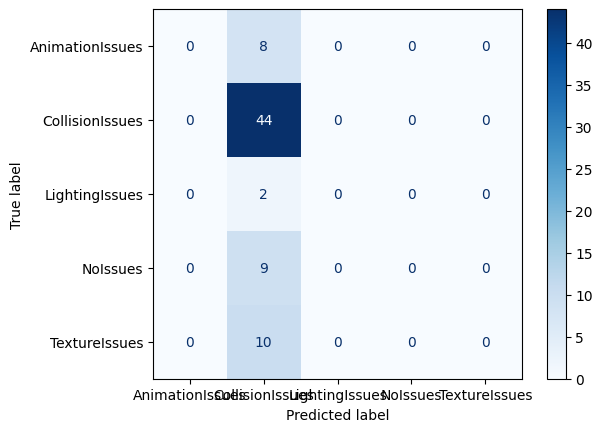

Precision: 0.3633
Recall: 0.6027
F1 Score: 0.4533


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

  base_model.trainable = False

  #for layer in base_model.layers:
  #    if "BatchNormalization" in layer.__class__.__name__:
  #        print("Layer unfrozen: ", layer)
  #        layer.trainable = True

  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    #layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.4,
      zoom_range=0.4,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    validation_datagen = ImageDataGenerator(
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_inception_v3_32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [50]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_inception_v3_32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Increase model capacity

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 65.7589 - accuracy: 0.3990 
Epoch 1: val_accuracy improved from -inf to 0.13636, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 313s 15s/step - loss: 65.7589 - accuracy: 0.3990 - val_loss: 25.4731 - val_accuracy: 0.1364
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 18.9501 - accuracy: 0.4126 
Epoch 2: val_accuracy improved from 0.13636 to 0.59091, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 277s 14s/step - loss: 18.9501 - accuracy: 0.4126 - val_los

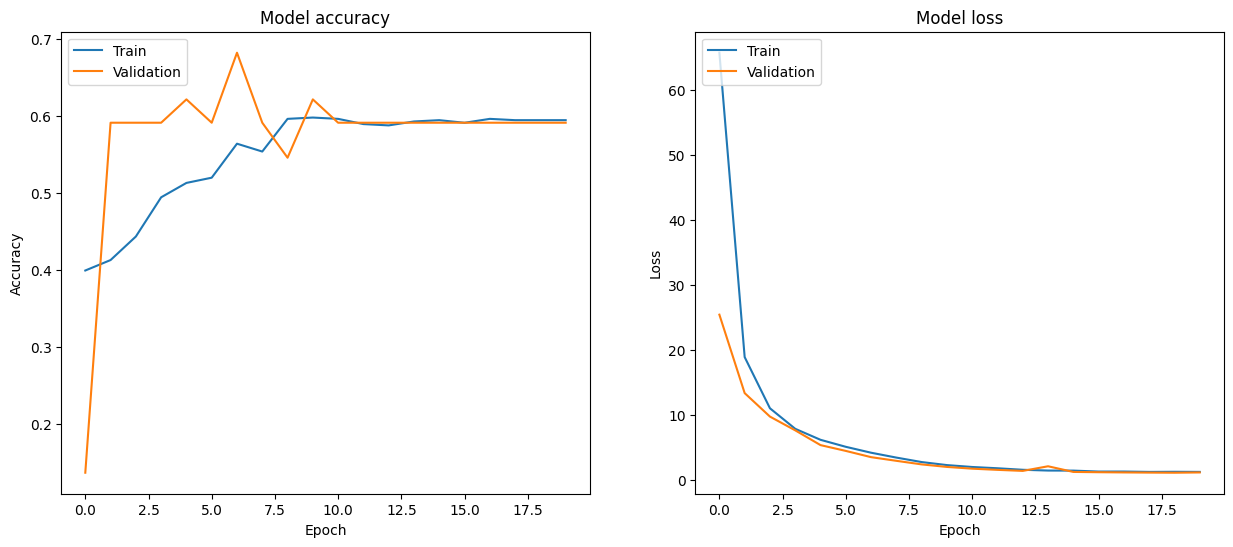

3/3 [==============================] - 27s 5s/step - loss: 3.5639 - accuracy: 0.6712
Test Accuracy: 67.12%
Test Loss: 3.5639
3/3 [==============================] - 22s 4s/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.66      1.00      0.79        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.00      0.00      0.00         9
  TextureIssues       0.83      0.50      0.62        10

       accuracy                           0.67        73
      macro avg       0.30      0.30      0.28        73
   weighted avg       0.51      0.67      0.56        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

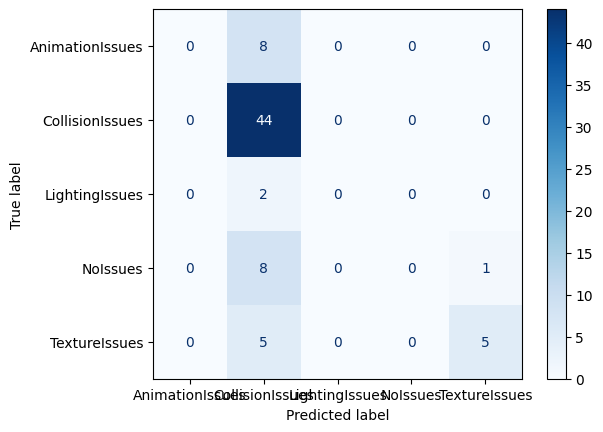

Precision: 0.5100
Recall: 0.6712
F1 Score: 0.5635


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

  base_model.trainable = False

  for layer in base_model.layers[:-30]:
    layer.trainable = True

  #for layer in base_model.layers:
  #    if "BatchNormalization" in layer.__class__.__name__:
  #        print("Layer unfrozen: ", layer)
  #        layer.trainable = True

  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    validation_datagen = ImageDataGenerator(
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_inception_v3_32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_inception_v3_32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')

Training with params: {'batch_size': 32, 'epochs': 20}
Found 589 images belonging to 5 classes.
Found 66 images belonging to 5 classes.
Found 73 images belonging to 5 classes.
{'AnimationIssues': 0, 'CollisionIssues': 1, 'LightingIssues': 2, 'NoIssues': 3, 'TextureIssues': 4}
Train generator number of samples:  589
Validation generator number of samples:  66
Epoch 1/20
19/19 [==============================] - ETA: 0s - loss: 34.6867 - accuracy: 0.4211 
Epoch 1: val_accuracy improved from -inf to 0.60606, saving model to best_inception_v3_32batch20epochs.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 346s 17s/step - loss: 34.6867 - accuracy: 0.4211 - val_loss: 29.5391 - val_accuracy: 0.6061
Epoch 2/20
19/19 [==============================] - ETA: 0s - loss: 28.9843 - accuracy: 0.4686 
Epoch 2: val_accuracy did not improve from 0.60606
19/19 [==============================] - 263s 14s/step - loss: 28.9843 - accuracy: 0.4686 - val_loss: 27.0485 - val_accuracy: 0.4091
Epoch 3/20
19/19 [==============================] - ETA: 0s - loss: 25.9970 - accuracy: 0.5042 
Epoch 3: val_accuracy improved from 0.60606 to 0.66667, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 365s 19s/step - loss: 25.9970 - accuracy: 0.5042 - val_loss: 24.2207 - val_accuracy: 0.6667
Epoch 4/20
19/19 [==============================] - ETA: 0s - loss: 23.1340 - accuracy: 0.5331 
Epoch 4: val_accuracy improved from 0.66667 to 0.69697, saving model to best_inception_v3_32batch20epochs.h5
19/19 [==============================] - 325

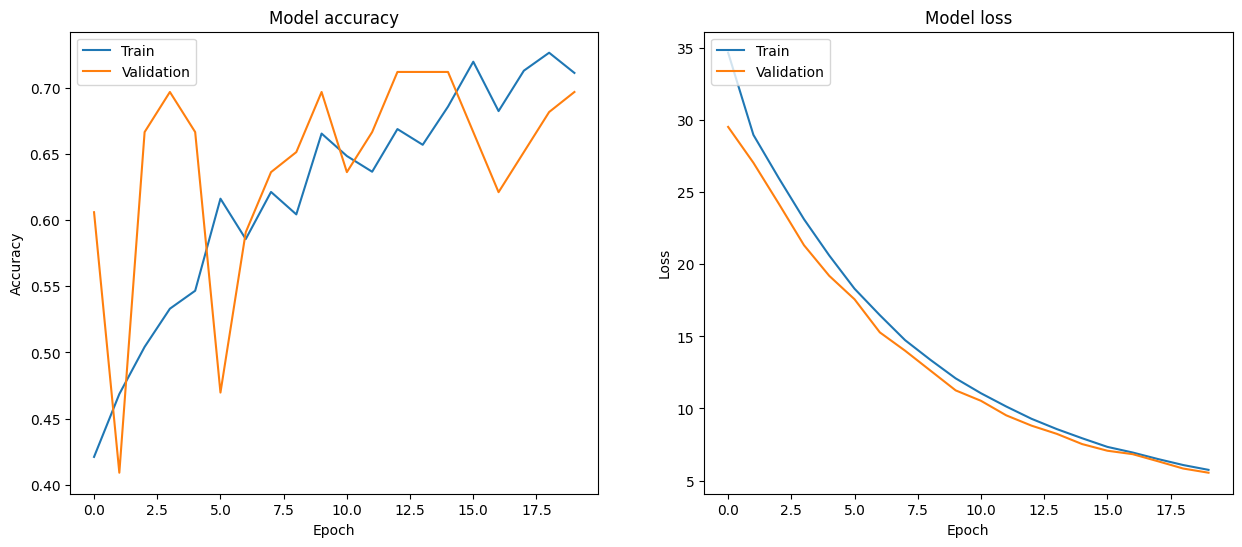

3/3 [==============================] - 22s 5s/step - loss: 8.8464 - accuracy: 0.6986
Test Accuracy: 69.86%
Test Loss: 8.8464
3/3 [==============================] - 23s 4s/step
                 precision    recall  f1-score   support

AnimationIssues       0.00      0.00      0.00         8
CollisionIssues       0.71      0.93      0.80        44
 LightingIssues       0.00      0.00      0.00         2
       NoIssues       0.44      0.44      0.44         9
  TextureIssues       1.00      0.60      0.75        10

       accuracy                           0.70        73
      macro avg       0.43      0.40      0.40        73
   weighted avg       0.62      0.70      0.64        73



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 1500x2500 with 0 Axes>

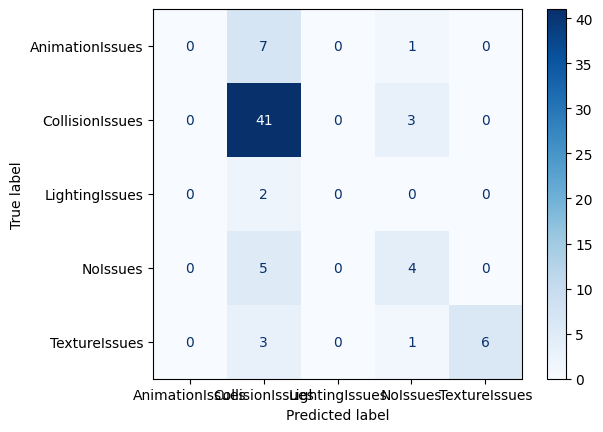

Precision: 0.6179
Recall: 0.6986
F1 Score: 0.6421


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import ParameterGrid
from sklearn.utils.class_weight import compute_class_weight
import os
import math

classes = ['AnimationIssues', 'CollisionIssues', 'LightingIssues', 'NoIssues', 'TextureIssues']

def create_model():
  base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

  base_model.trainable = False

  for layer in base_model.layers[:-30]:
    layer.trainable = True

  #for layer in base_model.layers:
  #    if "BatchNormalization" in layer.__class__.__name__:
  #        print("Layer unfrozen: ", layer)
  #        layer.trainable = True

  model = models.Sequential([
   base_model,
    layers.Flatten(),
    layers.Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.2),
    layers.Dense(5, activation='softmax')
])

  model.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

  #model.summary()
  return model


def create_data_generators(batch_size):
    train_datagen = ImageDataGenerator(
      #rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      #fill_mode='nearest',
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    validation_datagen = ImageDataGenerator(
      preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.inception_v3.preprocess_input)

    train_generator = train_datagen.flow_from_directory('./dataset/train', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    validation_generator = validation_datagen.flow_from_directory('./dataset/validation', target_size=(299, 299), batch_size=batch_size, class_mode='categorical')
    test_generator = test_datagen.flow_from_directory('./dataset/test', target_size=(299, 299), batch_size=batch_size, class_mode='categorical', shuffle=False)
    #print classes:
    print(train_generator.class_indices)

    #Get number of images in each class before augmentation
    #print('Number of images in the train folder:')
    #print('NoIssues:', len(os.listdir('./dataset/train/NoIssues')))
    #print('CollisionIssues:', len(os.listdir('./dataset/train/CollisionIssues')))
    #print('TextureIssues:', len(os.listdir('./dataset/train/TextureIssues')))
    #print('LightingIssues:', len(os.listdir('./dataset/train/LightingIssues')))
    #print('AnimationIssues:', len(os.listdir('./dataset/train/AnimationIssues')))
    return train_generator, validation_generator, test_generator

# Model checkpoint callback
checkpoint_callback = ModelCheckpoint(
    filepath='best_inception_v3_32batch20epochs.h5',  # Filepath to save the best model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only the best model
    mode='max',                # Save when the monitored metric is at its maximum
    verbose=1                  # Verbosity mode
)

# Function to plot some augmented images
def plot_augmented_images(generator, class_indices, num_images=9):
    images, labels = next(generator)
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        img = images[i]

        # Normalize the image to [0, 1] range for display
        img = (img - img.min()) / (img.max() - img.min())

        plt.imshow(img)
        label = list(class_indices.keys())[np.argmax(labels[i])]
        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

def apply_smote(train_generator):
    x_list = []
    y_list = []

    # Collect all data
    for _ in range(len(train_generator)):
        x_batch, y_batch = next(train_generator)
        x_list.append(x_batch)
        y_list.append(y_batch)

    x = np.concatenate(x_list)
    y = np.concatenate(y_list)

    # Reshape for SMOTE
    X_train = x.reshape(x.shape[0], -1)
    smote = SMOTE()
    X_smote, y_smote = smote.fit_resample(X_train, y)

    # Reshape back to image dimensions
    X_smote_img = X_smote.reshape(X_smote.shape[0], 224, 224, 3)

    return X_smote_img, y_smote


# Plot some augmented images
#plot_augmented_images(train_generator, train_generator.class_indices)

#early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)
#seed = 7
#np.random.seed(seed)

batch_sizes = [32]
epochs_list = [20]

param_grid = {'batch_size': batch_sizes, 'epochs': epochs_list}

best_score = 0
best_params = None
history = None
for params in ParameterGrid(param_grid):
    batch_size = params['batch_size']
    epochs = params['epochs']
    print(f"Training with params: {params}")
    train_generator, validation_generator, test_generator = create_data_generators(batch_size)
    model = create_model()

    #X_smote_img, y_smote = apply_smote(train_generator)

    # Print the shape of the oversampled data
    #print('Shape of X_smote_img:', X_smote_img.shape)
    #print('Shape of y_smote:', y_smote.shape)
    print("Train generator number of samples: ", train_generator.samples)
    print("Validation generator number of samples: ", validation_generator.samples)
    #Train:
    history = model.fit(
      #X_smote_img, y_smote,
      train_generator,
      steps_per_epoch= math.ceil(train_generator.samples / train_generator.batch_size),
      epochs=epochs,
      validation_data=validation_generator,
      validation_steps=math.ceil(validation_generator.samples / validation_generator.batch_size),
      callbacks=[checkpoint_callback]
    )
    val_accuracy = history.history['val_accuracy'][-1] #Get validation accuracy from last epoch

    if val_accuracy > best_score:
      best_score = val_accuracy
      best_params = params


print(f"Best params: {best_params}, Best validation accuracy: {best_score}")
best_batch_size = best_params['batch_size']
best_epochs = best_params['epochs']

train_generator, validation_generator, test_generator = create_data_generators(best_batch_size)

best_model = tf.keras.models.load_model('best_inception_v3_32batch20epochs.h5')

#Plot the accuracy and loss curves:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = best_model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Test Loss: {loss:.4f}")

test_generator.reset()
# Predict the values from the test set
Y_pred = best_model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())

# Print classification report
print(classification_report(y_true, y_pred, target_names=class_names))

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot confusion matrix
plt.figure(figsize=(15, 25))
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Compute precision, recall, and F1 score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

#Save the model:
#model.save('model1_VGG.h5')